## Загрузка данных

In [1]:
pip install phik

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade shap matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import (train_test_split, RandomizedSearchCV, cross_val_score, 
                                    StratifiedKFold, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, 
                                 MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, fbeta_score, accuracy_score, classification_report, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import phik
from phik import report, outliers
from phik.report import plot_correlation_matrix
from scipy import stats
import argparse
import pickle
import joblib
import json
import os
import sys
from io import StringIO

In [7]:
heart_test = pd.read_csv('/home/svetlana/Git/HeartRisk Predictor/heart_test.csv')
heart_train = pd.read_csv('/home/svetlana/Git/HeartRisk Predictor/heart_train.csv')

## Предобработка данных

In [8]:
heart_test.head(10)

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825
5,5,0.561798,0.792857,0.026581,1.0,1.0,1.0,1.0,0.0,0.774470,...,0.362338,1.0,0.666667,0.227018,0.048229,0.036512,Male,0.161290,0.593023,1076
6,6,0.674157,0.853571,0.019248,1.0,1.0,1.0,0.0,1.0,0.149123,...,0.211688,3.0,0.000000,0.227018,0.048229,0.036512,Male,0.535484,0.546512,5020
7,7,0.539326,0.335714,0.036664,1.0,1.0,1.0,0.0,1.0,0.329720,...,0.835065,7.0,0.666667,0.695652,0.002466,0.000874,Male,0.496774,0.662791,4267
8,8,0.449438,0.328571,0.075160,1.0,0.0,1.0,0.0,0.0,0.487405,...,0.819481,2.0,0.166667,0.227018,0.048229,0.036512,Male,0.677419,0.430233,4003
9,9,0.617978,0.728571,0.032081,0.0,1.0,1.0,0.0,0.0,0.211485,...,0.196104,0.0,1.000000,0.227018,0.048229,0.036512,Male,0.722581,0.255814,2519


In [9]:
heart_train.head(10)

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047
5,5,0.168539,0.764286,0.057745,0.0,1.0,1.0,1.0,1.0,0.082682,...,6.0,0.833333,0.0,0.227018,0.048229,0.036512,Male,0.464516,0.418605,5817
6,6,0.483146,0.021429,0.036664,1.0,0.0,1.0,0.0,1.0,0.540206,...,5.0,0.000000,1.0,0.231225,0.008940,0.000291,Male,0.361290,0.569767,5580
7,7,0.235955,0.939286,0.081577,1.0,0.0,1.0,0.0,1.0,0.290837,...,4.0,0.000000,0.0,0.227018,0.048229,0.036512,Male,0.690323,0.639535,4963
8,8,0.685393,0.317857,0.039413,0.0,0.0,1.0,0.0,0.0,0.803160,...,6.0,0.166667,1.0,0.126482,0.002332,0.007185,Male,0.664516,0.616279,4521
9,9,0.213483,0.796429,0.076994,1.0,1.0,1.0,1.0,0.0,0.506971,...,3.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.651613,0.720930,2455


Привела названия столбцов к змеиному регистру

In [10]:
heart_test.columns = heart_test.columns.str.replace(' ', '_').str.lower()
heart_train.columns = heart_train.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()

In [11]:
heart_test.head(10)

,unnamed:_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,blood_sugar,ck-mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825
5,5,0.561798,0.792857,0.026581,1.0,1.0,1.0,1.0,0.0,0.774470,...,0.362338,1.0,0.666667,0.227018,0.048229,0.036512,Male,0.161290,0.593023,1076
6,6,0.674157,0.853571,0.019248,1.0,1.0,1.0,0.0,1.0,0.149123,...,0.211688,3.0,0.000000,0.227018,0.048229,0.036512,Male,0.535484,0.546512,5020
7,7,0.539326,0.335714,0.036664,1.0,1.0,1.0,0.0,1.0,0.329720,...,0.835065,7.0,0.666667,0.695652,0.002466,0.000874,Male,0.496774,0.662791,4267
8,8,0.449438,0.328571,0.075160,1.0,0.0,1.0,0.0,0.0,0.487405,...,0.819481,2.0,0.166667,0.227018,0.048229,0.036512,Male,0.677419,0.430233,4003
9,9,0.617978,0.728571,0.032081,0.0,1.0,1.0,0.0,0.0,0.211485,...,0.196104,0.0,1.000000,0.227018,0.048229,0.036512,Male,0.722581,0.255814,2519


In [12]:
heart_test.loc[:, 'diet':'bmi'].head(10)

,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi
0,2,0.0,0.0,8.0,0.194370,0.587759,0.283490
1,2,1.0,1.0,5.0,0.329888,0.602883,0.467036
2,0,0.0,0.0,10.0,0.780075,0.370436,0.409366
3,0,0.0,0.0,10.0,0.785071,0.368242,0.910261
4,0,0.0,0.0,7.0,0.070919,0.729578,0.758924
5,2,0.0,1.0,8.0,0.044114,0.813517,0.723416
6,1,0.0,0.0,8.0,0.305998,0.562542,0.696128
7,1,1.0,0.0,1.0,0.377016,0.235091,0.484368
8,2,1.0,0.0,10.0,0.089371,0.486634,0.409407
9,2,1.0,1.0,8.0,0.524318,0.083936,0.657387


In [13]:
heart_train.head(10)

,unnamed:_0,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk_binary,blood_sugar,ck-mb,troponin,gender,systolic_blood_pressure,diastolic_blood_pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047
5,5,0.168539,0.764286,0.057745,0.0,1.0,1.0,1.0,1.0,0.082682,...,6.0,0.833333,0.0,0.227018,0.048229,0.036512,Male,0.464516,0.418605,5817
6,6,0.483146,0.021429,0.036664,1.0,0.0,1.0,0.0,1.0,0.540206,...,5.0,0.000000,1.0,0.231225,0.008940,0.000291,Male,0.361290,0.569767,5580
7,7,0.235955,0.939286,0.081577,1.0,0.0,1.0,0.0,1.0,0.290837,...,4.0,0.000000,0.0,0.227018,0.048229,0.036512,Male,0.690323,0.639535,4963
8,8,0.685393,0.317857,0.039413,0.0,0.0,1.0,0.0,0.0,0.803160,...,6.0,0.166667,1.0,0.126482,0.002332,0.007185,Male,0.664516,0.616279,4521
9,9,0.213483,0.796429,0.076994,1.0,1.0,1.0,1.0,0.0,0.506971,...,3.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.651613,0.720930,2455


In [14]:
heart_train.loc[:, 'diet':'bmi'].head(10)

,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi
0,1,1.0,0.0,8.0,0.225704,0.105948,0.459176
1,2,1.0,0.0,9.0,0.289923,0.164217,0.117053
2,2,1.0,1.0,6.0,0.550133,0.598745,0.373574
3,0,0.0,1.0,3.0,0.330962,0.077605,0.049735
4,1,0.0,0.0,8.0,0.524600,0.341960,0.830405
5,1,1.0,0.0,7.0,0.558262,0.640836,0.110571
6,2,0.0,1.0,9.0,0.827611,0.774609,0.073718
7,2,0.0,1.0,7.0,0.225275,0.999364,0.001534
8,0,1.0,1.0,3.0,0.828176,0.142208,0.093073
9,1,0.0,0.0,7.0,0.692973,0.820952,0.145447


In [15]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart_rate                       966 non-null    float64
 4   diabetes                         935 non-null    float64
 5   family_history                   935 non-null    float64
 6   smoking                          935 non-null    float64
 7   obesity                          935 non-null    float64
 8   alcohol_consumption              935 non-null    float64
 9   exercise_hours_per_week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous_heart_problems          935 non-null    float64
 12  medication_use        

In [16]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       8685 non-null   int64  
 1   age                              8685 non-null   float64
 2   cholesterol                      8685 non-null   float64
 3   heart_rate                       8685 non-null   float64
 4   diabetes                         8442 non-null   float64
 5   family_history                   8442 non-null   float64
 6   smoking                          8442 non-null   float64
 7   obesity                          8442 non-null   float64
 8   alcohol_consumption              8442 non-null   float64
 9   exercise_hours_per_week          8685 non-null   float64
 10  diet                             8685 non-null   int64  
 11  previous_heart_problems          8442 non-null   float64
 12  medication_use      

Пропуски только в категориальных столбцах, предпологаю, что пропуски означают значение 0, поэтому заменю пропуски 0.

In [17]:
columns_with_missing = ['diabetes', 'family_history', 'smoking', 'obesity',
                       'alcohol_consumption', 'previous_heart_problems', 
                       'medication_use', 'stress_level', 
                       'physical_activity_days_per_week']

heart_train[columns_with_missing] = heart_train[columns_with_missing].fillna(0)

heart_test[columns_with_missing] = heart_test[columns_with_missing].fillna(0)

Приведу категариальные и бинарные признаки к целочисленному типу данных.

In [18]:
binary_cols_2 = ['diabetes', 'family_history', 'smoking', 'obesity', 
               'alcohol_consumption', 'previous_heart_problems', 'medication_use', 'stress_level', 'heart_attack_risk_binary'] 
binary_cols_1 = ['diabetes', 'family_history', 'smoking', 'obesity', 
               'alcohol_consumption', 'previous_heart_problems', 'medication_use', 'stress_level']

heart_test[binary_cols_1] = heart_test[binary_cols_1].astype('int')
heart_train[binary_cols_2] = heart_train[binary_cols_2].astype('int')

In [19]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       966 non-null    int64  
 1   age                              966 non-null    float64
 2   cholesterol                      966 non-null    float64
 3   heart_rate                       966 non-null    float64
 4   diabetes                         966 non-null    int64  
 5   family_history                   966 non-null    int64  
 6   smoking                          966 non-null    int64  
 7   obesity                          966 non-null    int64  
 8   alcohol_consumption              966 non-null    int64  
 9   exercise_hours_per_week          966 non-null    float64
 10  diet                             966 non-null    int64  
 11  previous_heart_problems          966 non-null    int64  
 12  medication_use        

In [20]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       8685 non-null   int64  
 1   age                              8685 non-null   float64
 2   cholesterol                      8685 non-null   float64
 3   heart_rate                       8685 non-null   float64
 4   diabetes                         8685 non-null   int64  
 5   family_history                   8685 non-null   int64  
 6   smoking                          8685 non-null   int64  
 7   obesity                          8685 non-null   int64  
 8   alcohol_consumption              8685 non-null   int64  
 9   exercise_hours_per_week          8685 non-null   float64
 10  diet                             8685 non-null   int64  
 11  previous_heart_problems          8685 non-null   int64  
 12  medication_use      

Проверю на дубликаты.

In [21]:
print("Уникальные значения в gender")
heart_test['gender'].str.lower().str.strip().value_counts().head()

Уникальные значения в gender


gender
male      650
female    285
1.0        22
0.0         9
Name: count, dtype: int64

In [22]:
print("Уникальные значения в gender")
heart_train['gender'].str.lower().str.strip().value_counts().head()

Уникальные значения в gender


gender
male      5882
female    2560
1.0        156
0.0         87
Name: count, dtype: int64

Преобразую несогласованные данные.

In [23]:
heart_test['gender'] = heart_test['gender'].astype(str).str.lower().str.strip()

gender_mapping = {
    '1.0': 'male',
    '0.0': 'female',
    'male': 'male',
    'female': 'female',
}

heart_test['gender'] = heart_test['gender'].map(gender_mapping)

print(heart_test['gender'].value_counts())

gender
male      672
female    294
Name: count, dtype: int64


In [24]:
heart_train['gender'] = heart_train['gender'].astype(str).str.lower().str.strip()

gender_mapping = {
    '1.0': 'male',
    '0.0': 'female',
    'male': 'male',
    'female': 'female',
}

heart_train['gender'] = heart_train['gender'].map(gender_mapping)

print(heart_train['gender'].value_counts())

gender
male      6038
female    2647
Name: count, dtype: int64


Явных дубликатов нет.

In [25]:
print(heart_test.duplicated().sum())
print(heart_train.duplicated().sum())

0
0


### Вывод 
Заполнила пропуски, преобразовала данные к более подходящему типу, проверила на дубликаты, преобразовала несогласованные данные.

## Исследовательский анализ данных

### Статистический анализ

In [26]:
print("\n=== ОСНОВНЫЕ СТАТИСТИКИ ДЛЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ (TRAIN) ===")
display(heart_train.describe().T)

print("\n=== ОСНОВНЫЕ СТАТИСТИКИ ДЛЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ (TEST) ===")
display(heart_test.describe().T)

print("\n=== СТАТИСТИКИ ДЛЯ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ (TRAIN) ===")
categorical_cols = heart_train.select_dtypes(include=['object', 'int64']).columns.tolist()
categorical_cols = [col for col in categorical_cols if heart_train[col].nunique() < 20]


for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = heart_train[col].value_counts(normalize=True) * 100
    print(value_counts.head().round(2).astype(str) + '%')

print("\n=== СТАТИСТИКИ ДЛЯ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ (TEST) ===")
categorical_cols = heart_test.select_dtypes(include=['object', 'int64']).columns.tolist()
categorical_cols = [col for col in categorical_cols if heart_test[col].nunique() < 20]


for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = heart_test[col].value_counts(normalize=True) * 100
    print(value_counts.head().round(2).astype(str) + '%')


=== ОСНОВНЫЕ СТАТИСТИКИ ДЛЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ (TRAIN) ===


,count,mean,std,min,25%,50%,75%,max
unnamed:_0,8685.0,4342.000000,2507.287877,0.0,2171.000000,4342.000000,6513.000000,8684.0
age,8685.0,0.449958,0.231174,0.0,0.258427,0.460674,0.640449,1.0
cholesterol,8685.0,0.501070,0.284716,0.0,0.267857,0.499780,0.746429,1.0
heart_rate,8685.0,0.050658,0.023453,0.0,0.034830,0.050412,0.065995,1.0
diabetes,8685.0,0.633851,0.481778,0.0,0.000000,1.000000,1.000000,1.0
family_history,8685.0,0.475878,0.499447,0.0,0.000000,0.000000,1.000000,1.0
smoking,8685.0,0.877605,0.327760,0.0,1.000000,1.000000,1.000000,1.0
obesity,8685.0,0.484398,0.499785,0.0,0.000000,0.000000,1.000000,1.0
alcohol_consumption,8685.0,0.585147,0.492725,0.0,0.000000,1.000000,1.000000,1.0
exercise_hours_per_week,8685.0,0.503378,0.284810,0.0,0.263286,0.502110,0.748709,1.0



=== ОСНОВНЫЕ СТАТИСТИКИ ДЛЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ (TEST) ===


,count,mean,std,min,25%,50%,75%,max
unnamed:_0,966.0,482.500000,279.004480,0.000000,241.250000,482.500000,723.750000,965.000000
age,966.0,0.452916,0.231068,0.044944,0.247191,0.460674,0.640449,0.853933
cholesterol,966.0,0.488181,0.282039,0.000000,0.243750,0.499780,0.710714,0.996429
heart_rate,966.0,0.051644,0.035502,0.000000,0.036664,0.050412,0.065995,1.000000
diabetes,966.0,0.635611,0.481508,0.000000,0.000000,1.000000,1.000000,1.000000
family_history,966.0,0.465839,0.499090,0.000000,0.000000,0.000000,1.000000,1.000000
smoking,966.0,0.869565,0.336956,0.000000,1.000000,1.000000,1.000000,1.000000
obesity,966.0,0.500000,0.500259,0.000000,0.000000,0.500000,1.000000,1.000000
alcohol_consumption,966.0,0.565217,0.495985,0.000000,0.000000,1.000000,1.000000,1.000000
exercise_hours_per_week,966.0,0.490706,0.284902,0.000336,0.243431,0.502110,0.734425,0.998938



=== СТАТИСТИКИ ДЛЯ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ (TRAIN) ===

diabetes:
diabetes
1    63.39%
0    36.61%
Name: proportion, dtype: object

family_history:
family_history
0    52.41%
1    47.59%
Name: proportion, dtype: object

smoking:
smoking
1    87.76%
0    12.24%
Name: proportion, dtype: object

obesity:
obesity
0    51.56%
1    48.44%
Name: proportion, dtype: object

alcohol_consumption:
alcohol_consumption
1    58.51%
0    41.49%
Name: proportion, dtype: object

diet:
diet
1    32.96%
2    32.19%
0    32.04%
3      2.8%
Name: proportion, dtype: object

previous_heart_problems:
previous_heart_problems
0    51.85%
1    48.15%
Name: proportion, dtype: object

medication_use:
medication_use
0    51.28%
1    48.72%
Name: proportion, dtype: object

stress_level:
stress_level
7    10.01%
4     9.87%
2     9.83%
9     9.81%
8     9.72%
Name: proportion, dtype: object

heart_attack_risk_binary:
heart_attack_risk_binary
0    65.31%
1    34.69%
Name: proportion, dtype: object

gender:
gender
ma

### Визуализация распределений

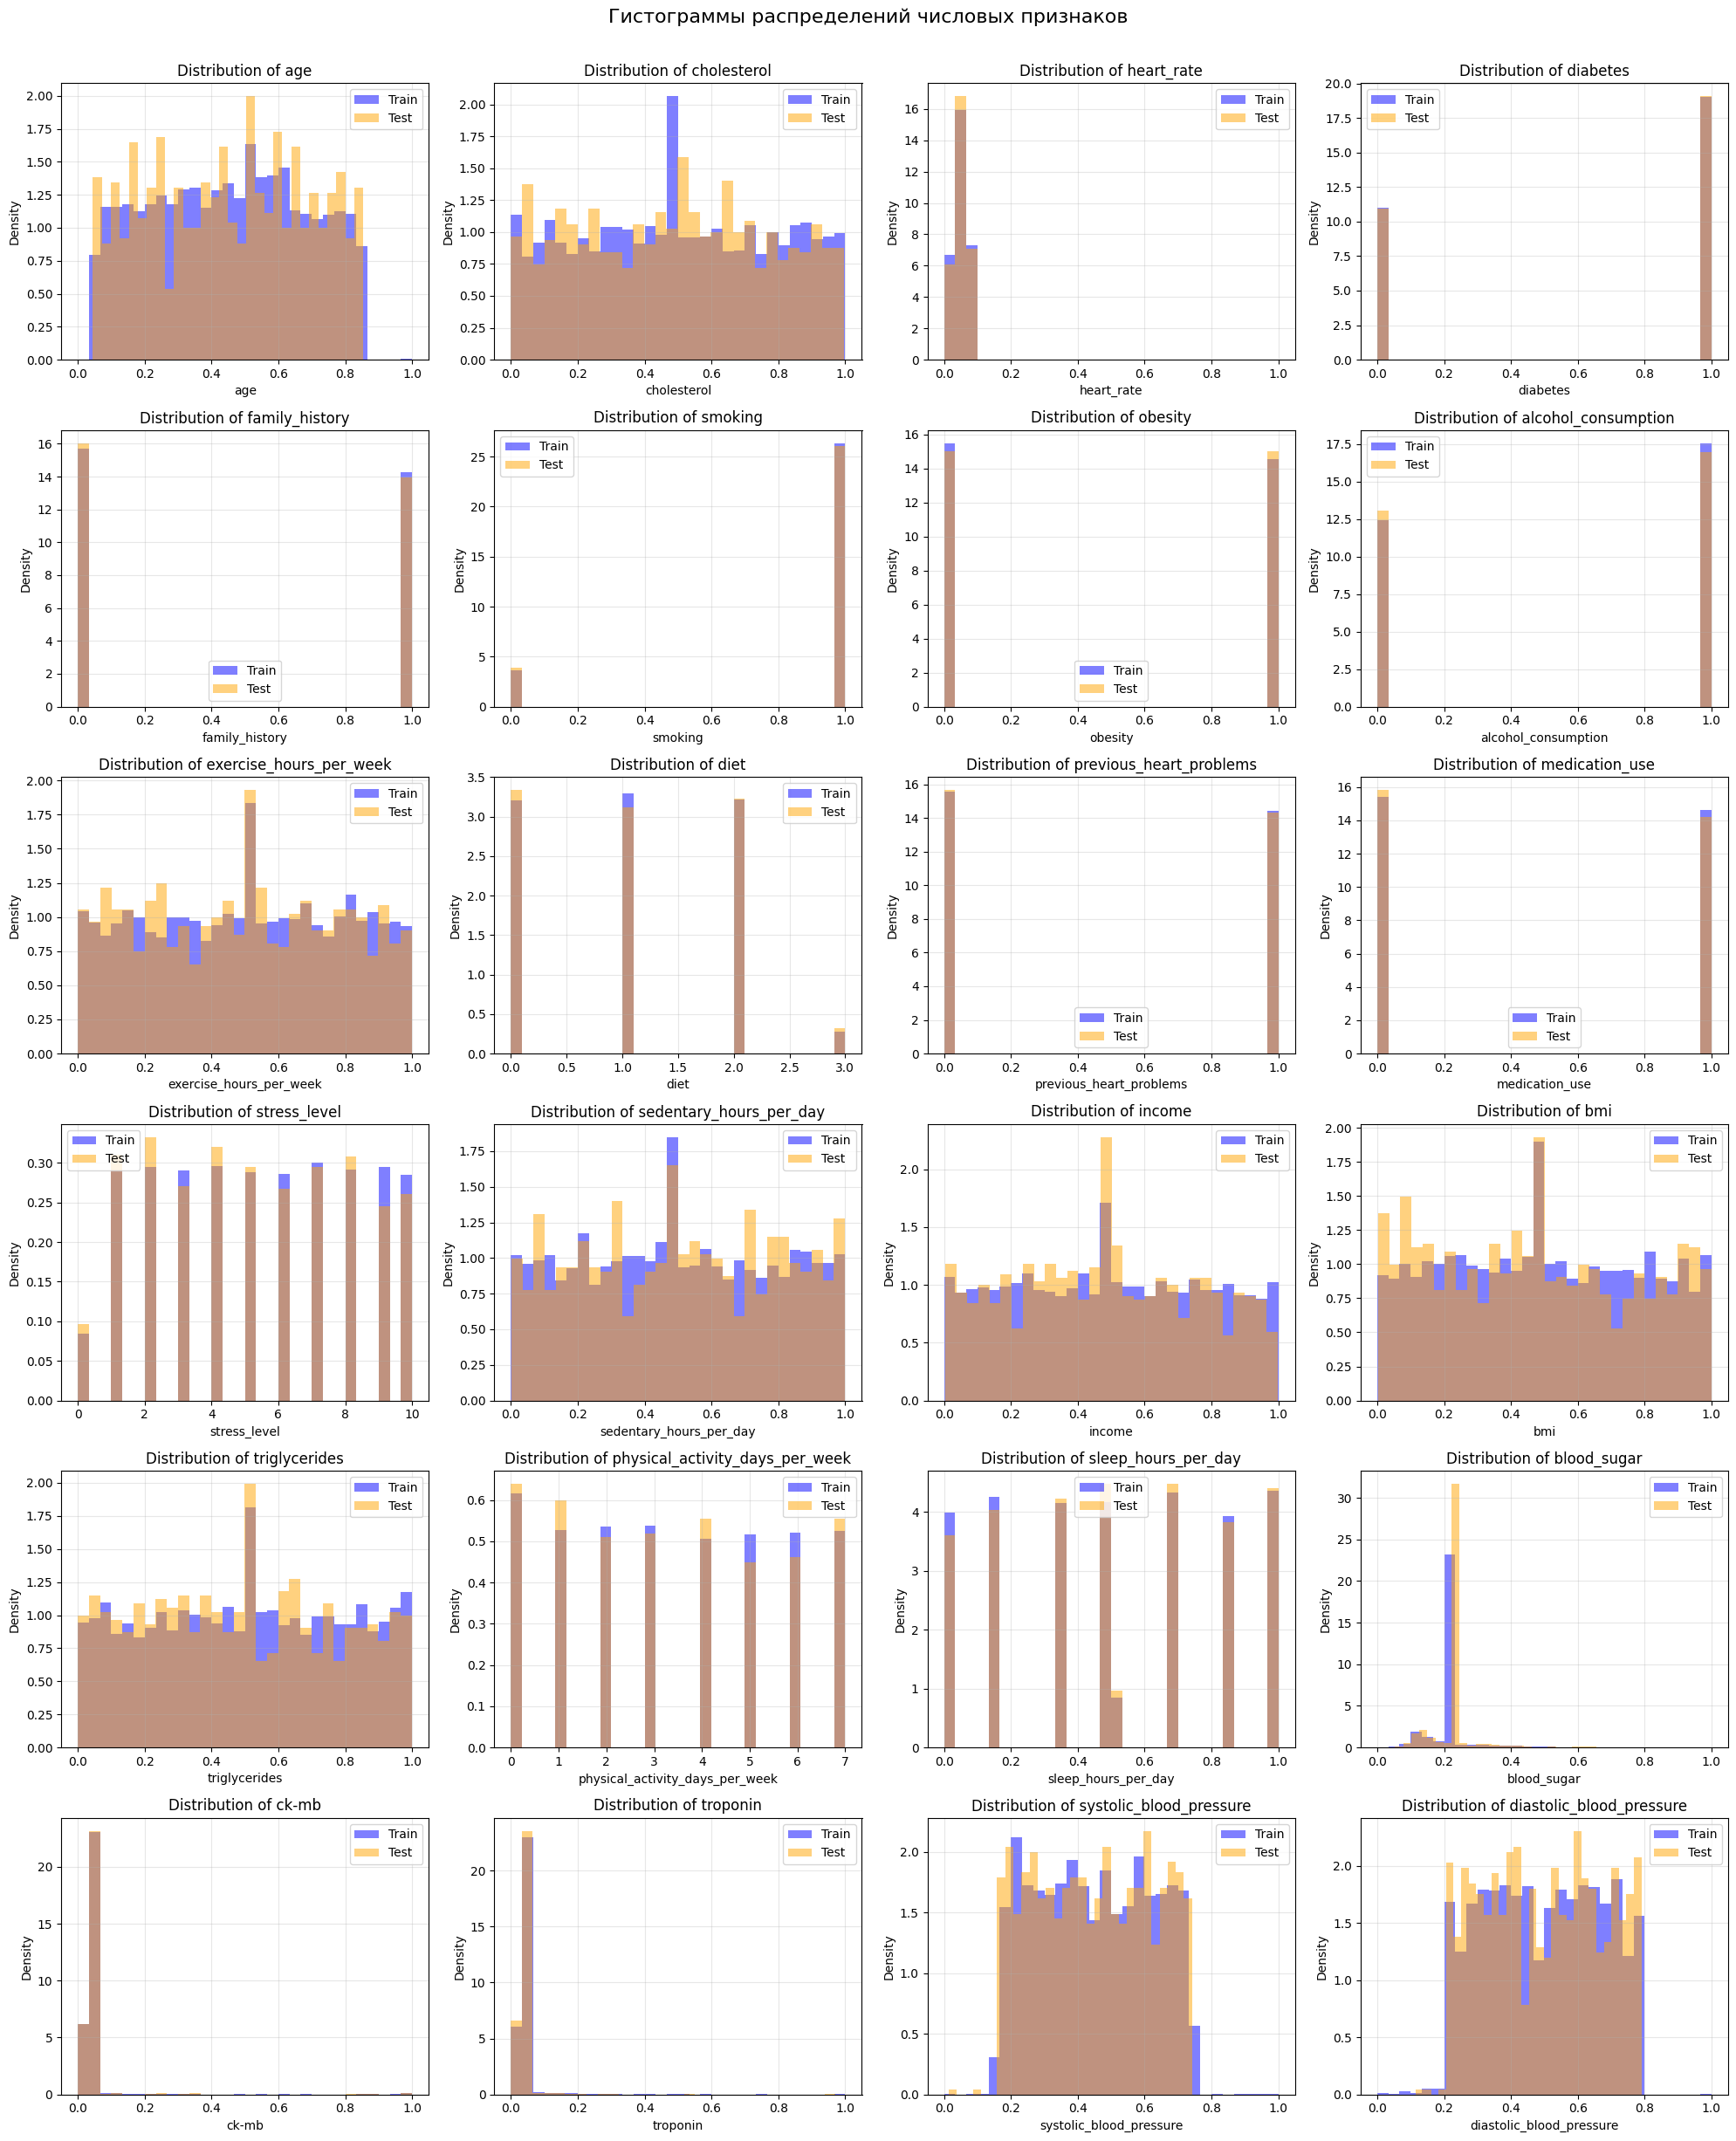

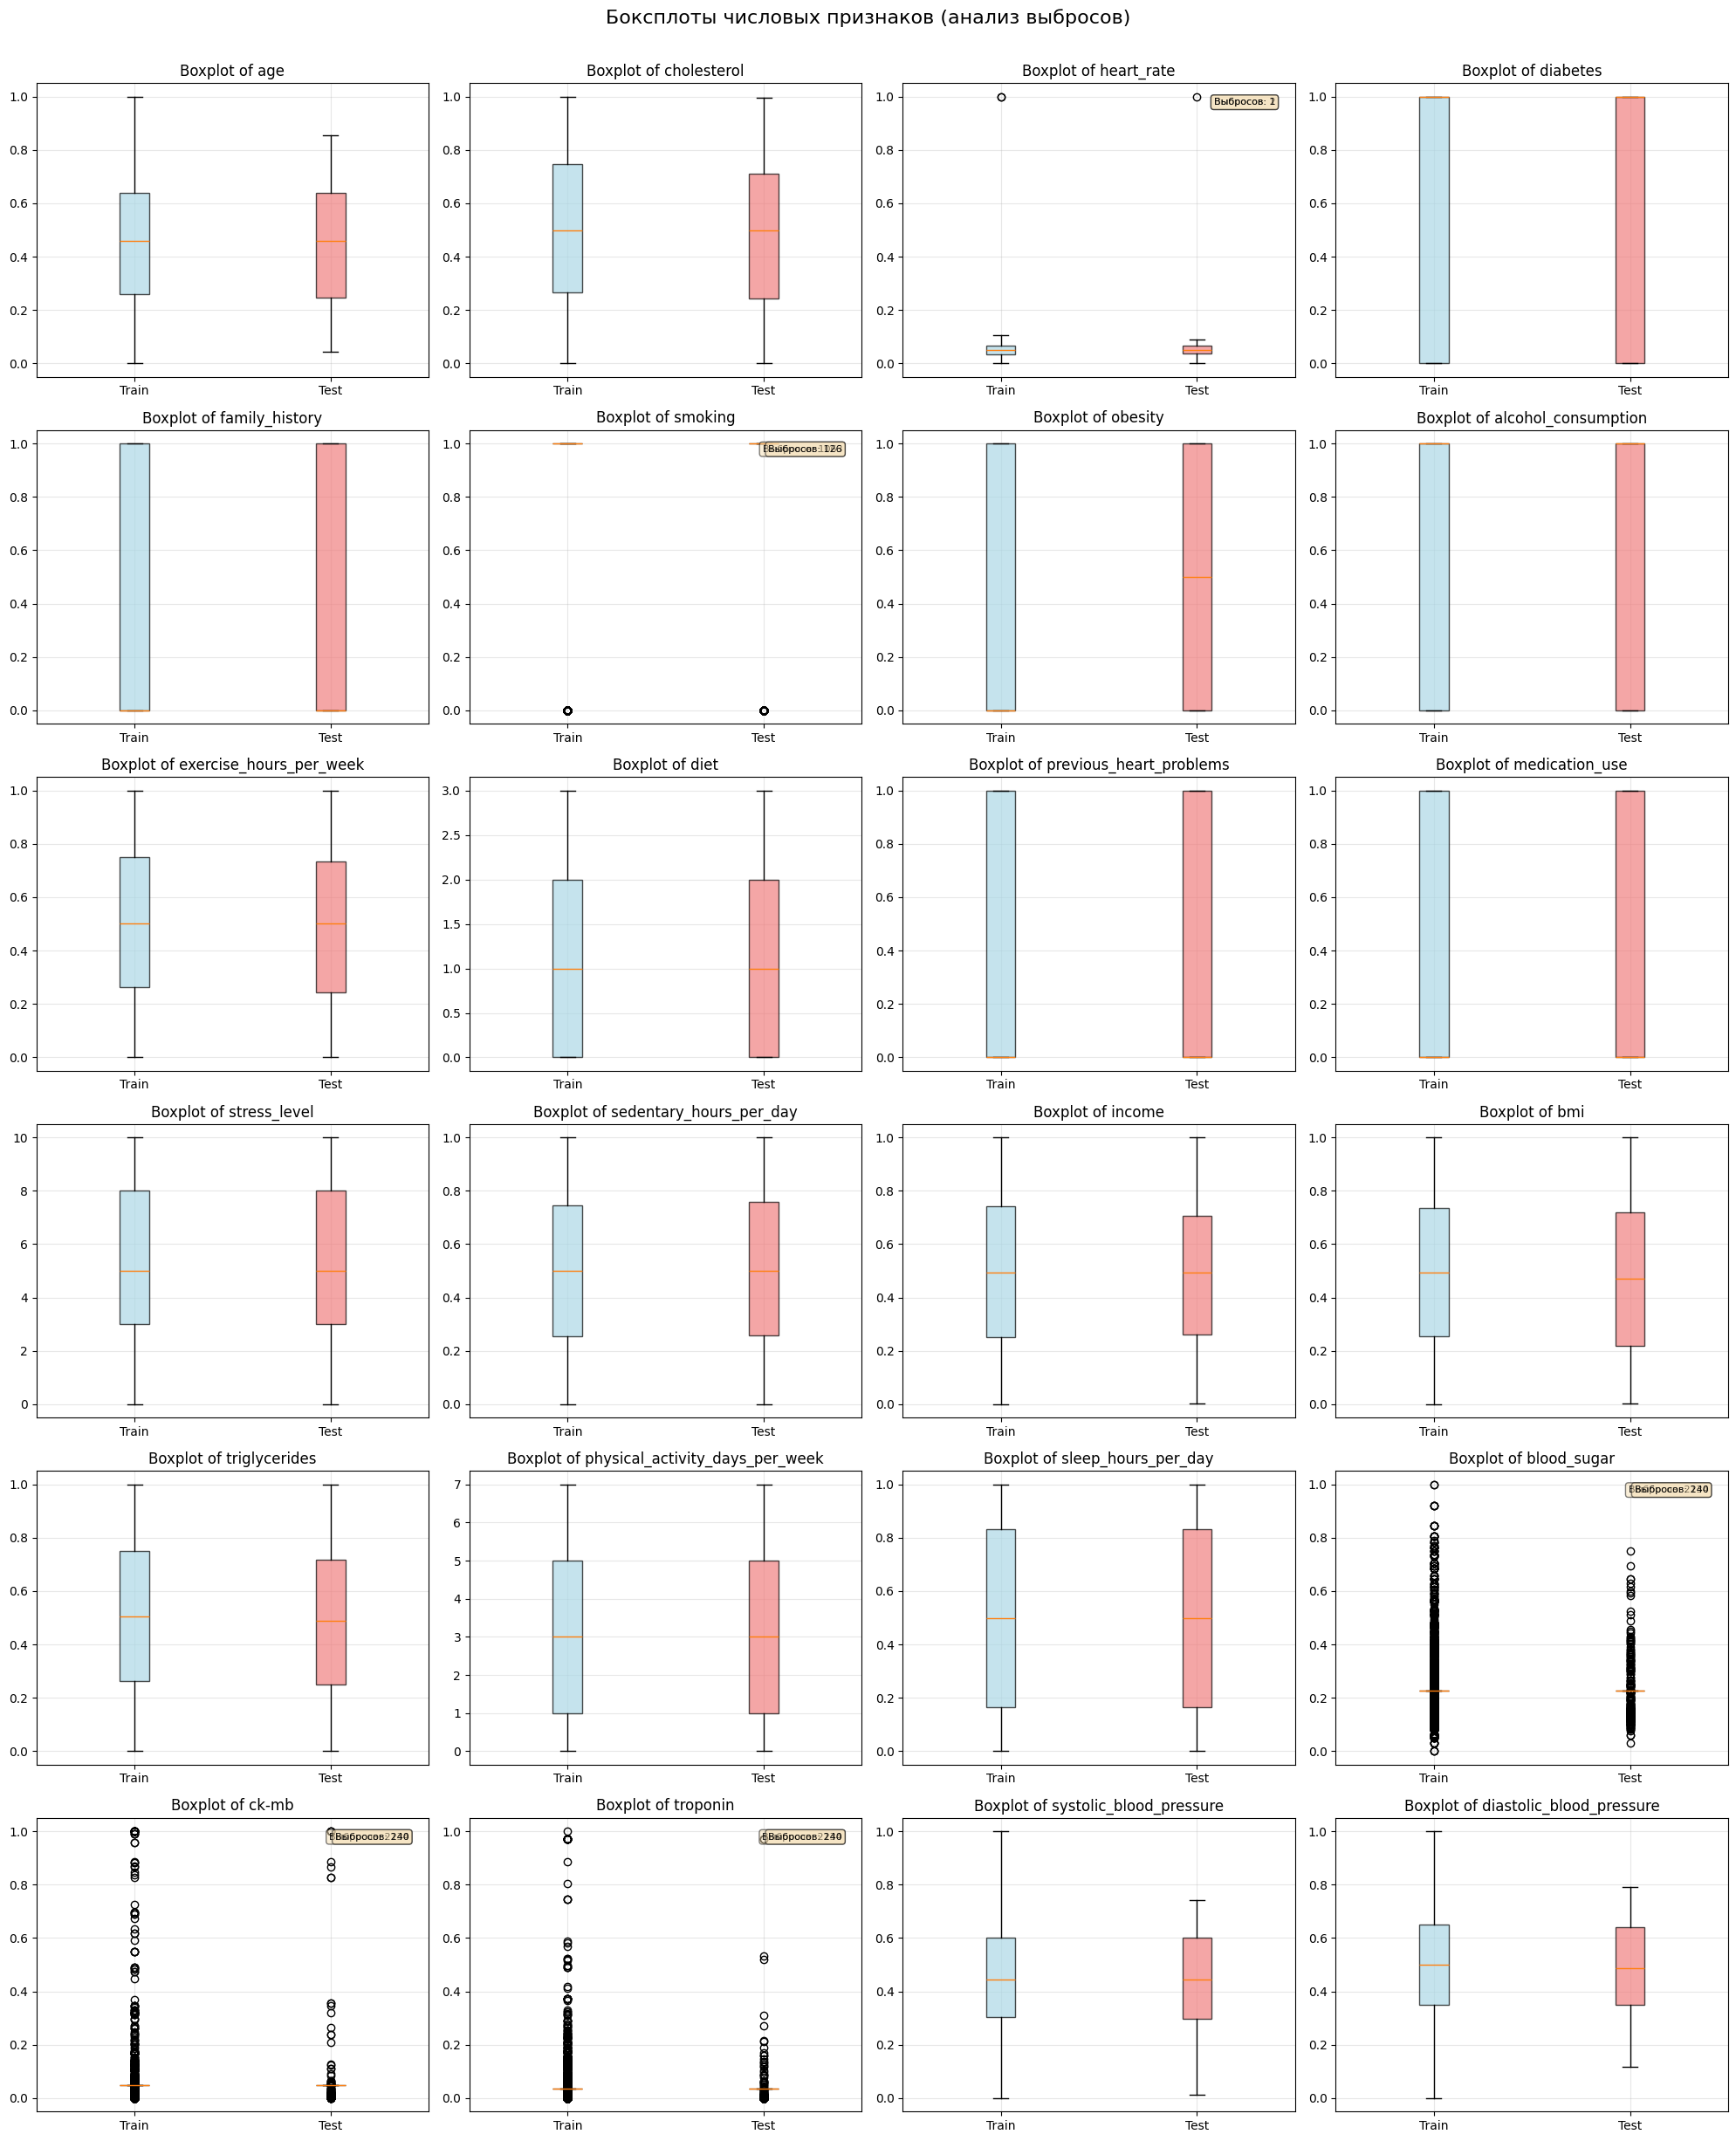


ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ

Обнаружено выбросов в 5 признаках из 24


,Признак,Выбросов,Процент,Min,Q1,Медиана,Q3,Max
21,troponin,2134,24.57%,0.0000,0.0365,0.0365,0.0365,1.0000
19,blood_sugar,2134,24.57%,0.0000,0.2270,0.2270,0.2270,1.0000
20,ck-mb,2134,24.57%,0.0000,0.0482,0.0482,0.0482,1.0000
5,smoking,1063,12.24%,0.0000,1.0000,1.0000,1.0000,1.0000
2,heart_rate,2,0.02%,0.0000,0.0348,0.0504,0.0660,1.0000
3,diabetes,0,0.00%,0.0000,0.0000,1.0000,1.0000,1.0000
1,cholesterol,0,0.00%,0.0000,0.2679,0.4998,0.7464,1.0000
0,age,0,0.00%,0.0000,0.2584,0.4607,0.6404,1.0000
7,alcohol_consumption,0,0.00%,0.0000,0.0000,1.0000,1.0000,1.0000
6,obesity,0,0.00%,0.0000,0.0000,0.0000,1.0000,1.0000


In [27]:
numeric_cols = heart_train.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['unnamed:_0', 'id']
if 'heart_attack_risk_binary' in heart_train.columns:
    exclude_cols.append('heart_attack_risk_binary')
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Гистограммы
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:len(axes)]):
    axes[idx].hist(heart_train[col], bins=30, alpha=0.5, density=True, label='Train', color='blue')
    
    if col in heart_test.columns:
        axes[idx].hist(heart_test[col], bins=30, alpha=0.5, density=True, label='Test', color='orange')
    
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Скрываем пустые subplot'ы
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Гистограммы распределений числовых признаков', y=1.02, fontsize=16)
plt.show()

# Боксплоты
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:len(axes)]):
    data_to_plot = []
    labels = []
    
    if col in heart_train.columns:
        data_to_plot.append(heart_train[col])
        labels.append('Train')
    
    if col in heart_test.columns:
        data_to_plot.append(heart_test[col])
        labels.append('Test')
    
    if data_to_plot:
        box = axes[idx].boxplot(data_to_plot, tick_labels=labels, patch_artist=True)
        
        # Раскрашиваем боксплоты
        colors = ['lightblue', 'lightcoral']
        for patch, color in zip(box['boxes'], colors[:len(data_to_plot)]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[idx].set_title(f'Boxplot of {col}')
        axes[idx].grid(True, alpha=0.3)
        
        # Добавляем количество выбросов
        if len(data_to_plot) > 0:
            # Вычисляем выбросы по IQR
            for i, data in enumerate(data_to_plot):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
                if len(outliers) > 0:
                    axes[idx].text(0.95, 0.95, f'Выбросов: {len(outliers)}', 
                                 transform=axes[idx].transAxes, fontsize=8,
                                 verticalalignment='top', horizontalalignment='right',
                                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Боксплоты числовых признаков (анализ выбросов)', y=1.02, fontsize=16)
plt.show()

print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ")
print("="*60)

outliers_summary = []

for col in numeric_cols:
    if col in heart_train.columns:
        # Вычисляем выбросы по IQR
        Q1 = heart_train[col].quantile(0.25)
        Q3 = heart_train[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = heart_train[(heart_train[col] < lower_bound) | (heart_train[col] > upper_bound)]
        outliers_pct = (len(outliers) / len(heart_train)) * 100
        
        outliers_summary.append({
            'Признак': col,
            'Выбросов': len(outliers),
            'Процент': f"{outliers_pct:.2f}%",
            'Min': f"{heart_train[col].min():.4f}",
            'Q1': f"{Q1:.4f}",
            'Медиана': f"{heart_train[col].median():.4f}",
            'Q3': f"{Q3:.4f}",
            'Max': f"{heart_train[col].max():.4f}"
        })

outliers_df = pd.DataFrame(outliers_summary)
print(f"\nОбнаружено выбросов в {len([x for x in outliers_df['Выбросов'] if x > 0])} признаках из {len(numeric_cols)}")
display(outliers_df.sort_values('Выбросов', ascending=False))

### Анализ категориальных переменных

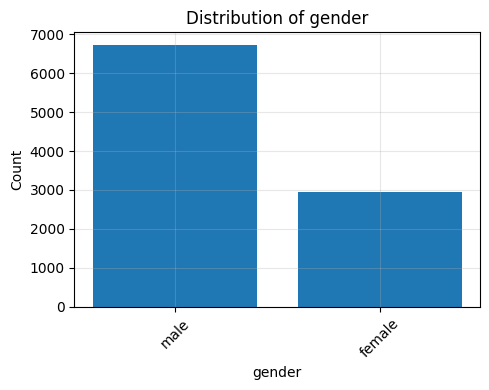

In [28]:
categorical_cols = heart_train.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    fig, axes = plt.subplots(1, len(categorical_cols), figsize=(5*len(categorical_cols), 4))
    
    if len(categorical_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(categorical_cols):
        # Объединяем train и test
        if col in heart_test.columns:
            combined = pd.concat([heart_train[col], heart_test[col]], ignore_index=True)
        else:
            combined = heart_train[col]
        
        value_counts = combined.value_counts()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Корреляционный анализ

interval columns not set, guessing: ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar', 'ck-mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure']


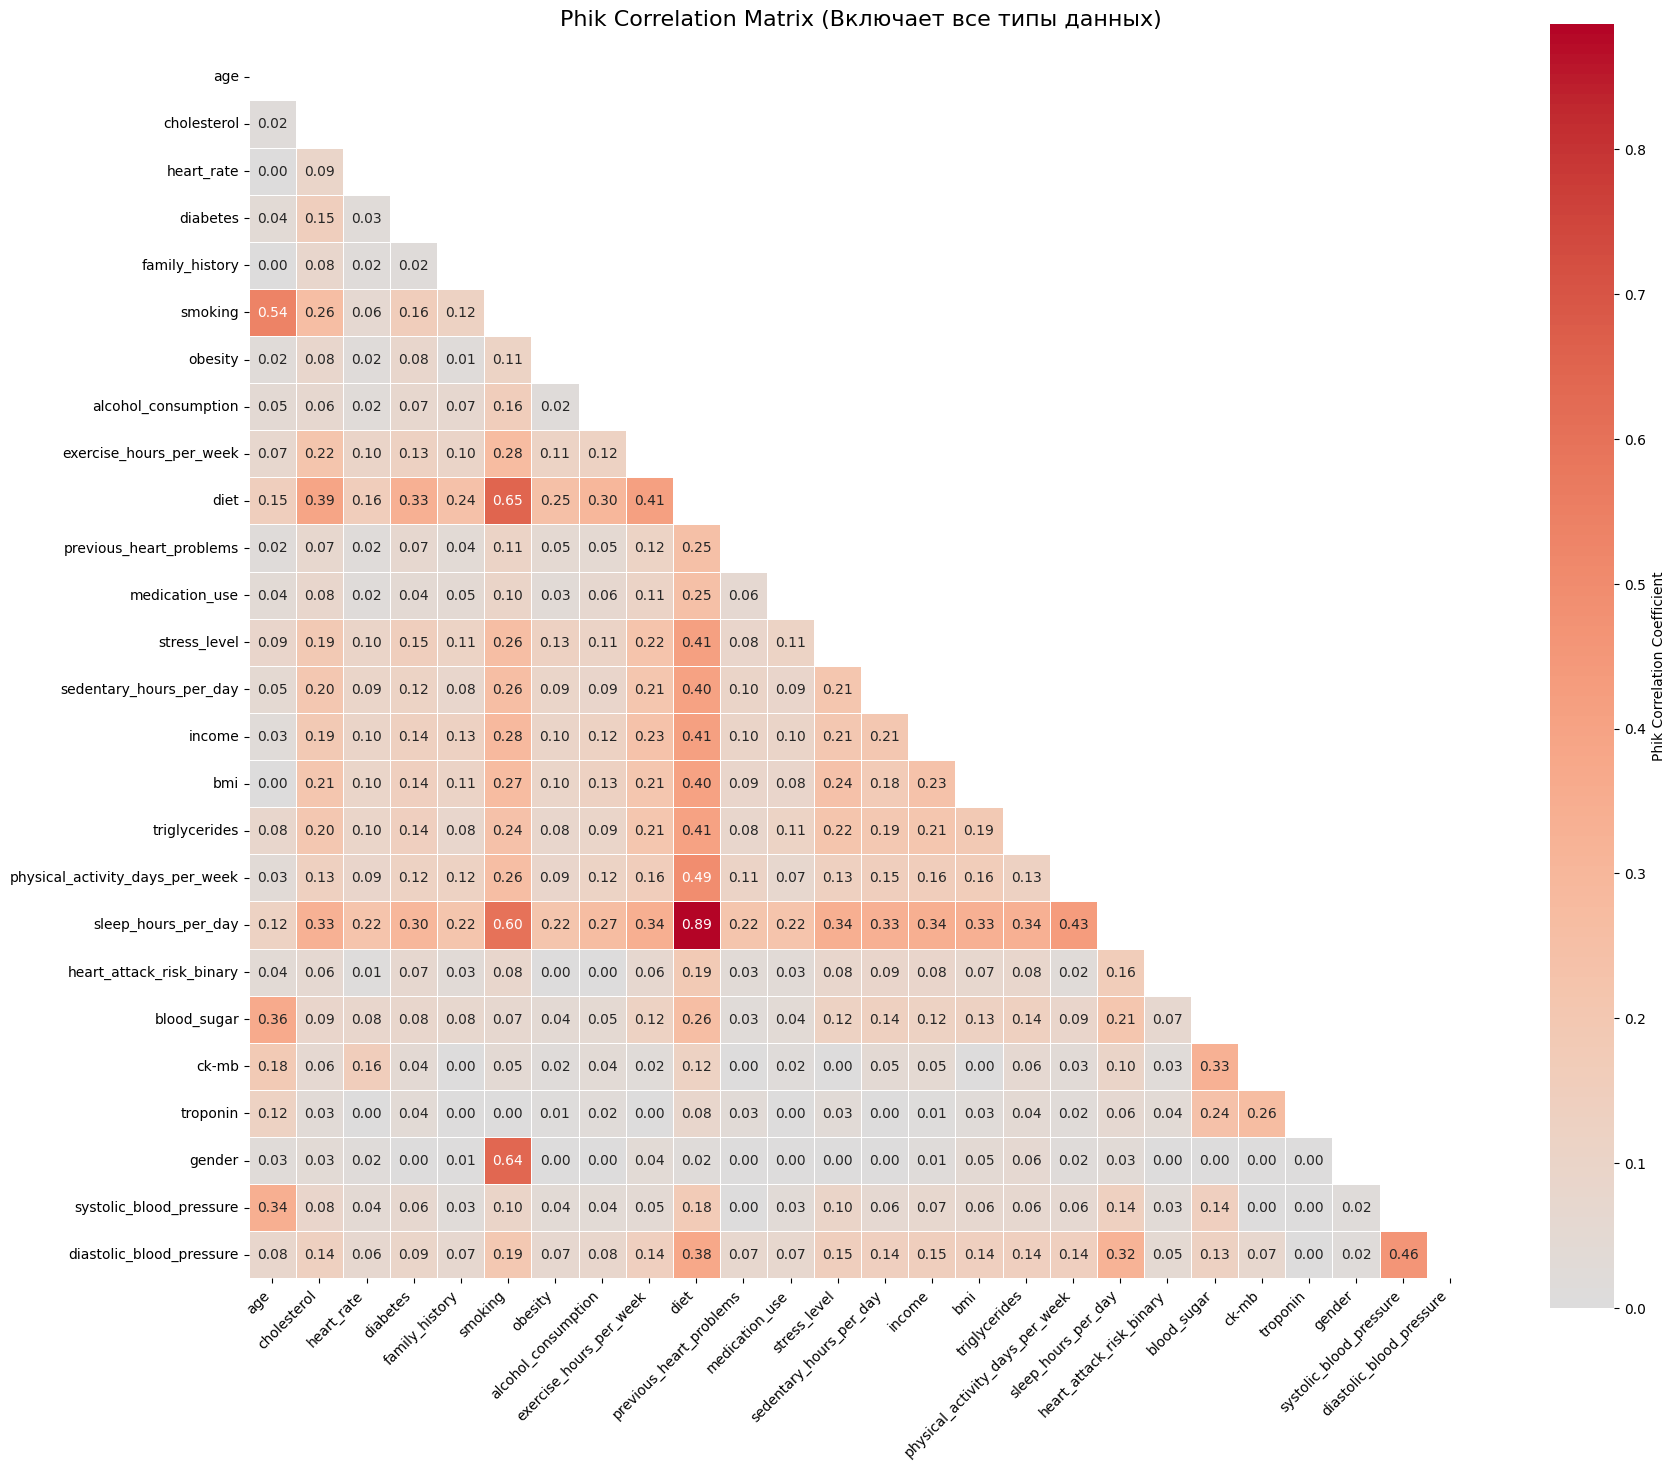


=== САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ (phik > 0.7) ===


,Признак 1,Признак 2,Корреляция
0,diet,sleep_hours_per_day,0.886625



=== КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (phik) ===

Топ-15 признаков по корреляции с целевой переменной:


,Признак,Phik Корреляция
0,heart_attack_risk_binary,1.000000
1,diet,0.186541
2,sleep_hours_per_day,0.164119
3,sedentary_hours_per_day,0.087030
4,income,0.083411
5,triglycerides,0.081883
6,smoking,0.078452
7,stress_level,0.078136
8,bmi,0.071483
9,blood_sugar,0.067118


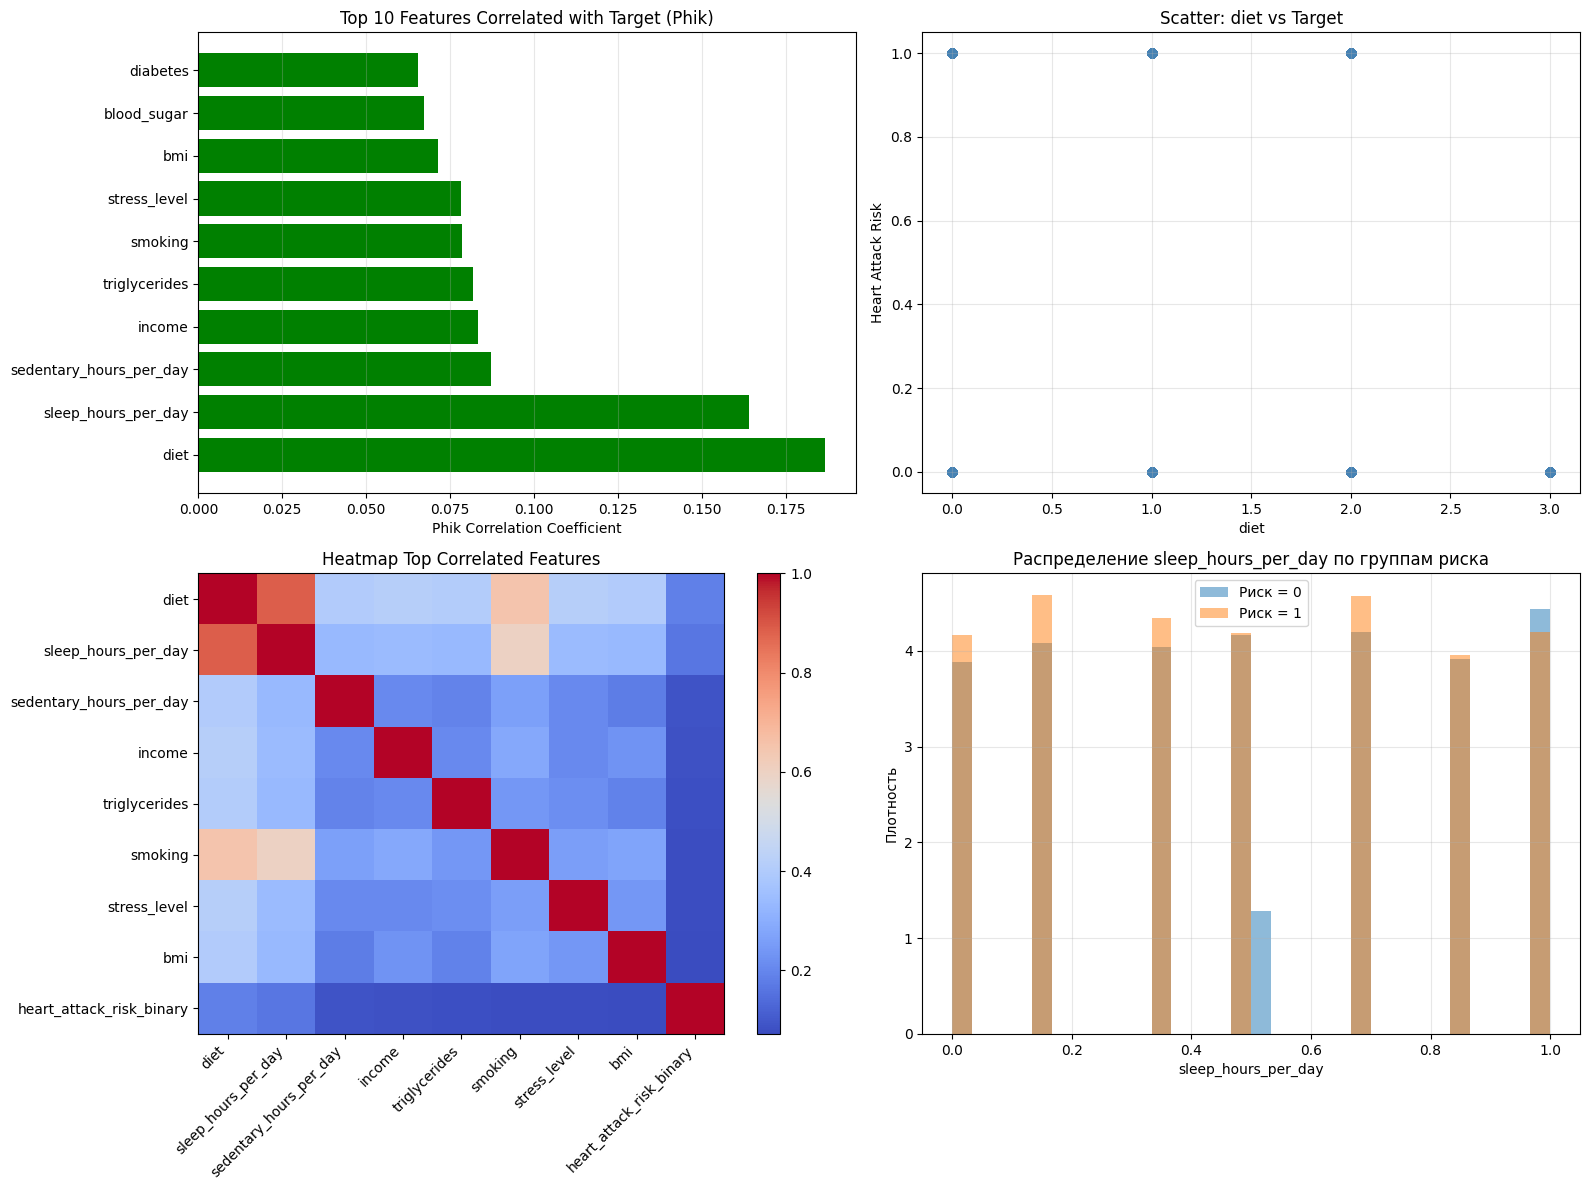

In [29]:
# Исключаем только технические колонки
all_features = [col for col in heart_train.columns if col not in ['unnamed:_0', 'id']]

# Создаем копию данных для phik анализа
phik_data = heart_train[all_features].copy()

try:
    phik_matrix = phik_data.phik_matrix()
    
    # Визуализация полной phik матрицы
    plt.figure(figsize=(18, 15))
    mask = np.triu(np.ones_like(phik_matrix, dtype=bool))  # Маска для верхнего треугольника
    
    sns.heatmap(phik_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                fmt='.2f', 
                linewidths=0.5, 
                square=True,
                mask=mask,  # Показываем только нижний треугольник
                cbar_kws={'label': 'Phik Correlation Coefficient'})
    
    plt.title('Phik Correlation Matrix (Включает все типы данных)', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Анализ сильных корреляций
    print("\n=== САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ (phik > 0.7) ===")
    
    # Получаем пары признаков с высокой корреляцией
    high_corr_pairs = []
    for i in range(len(phik_matrix.columns)):
        for j in range(i+1, len(phik_matrix.columns)):
            corr_value = phik_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                high_corr_pairs.append({
                    'Признак 1': phik_matrix.columns[i],
                    'Признак 2': phik_matrix.columns[j],
                    'Корреляция': corr_value
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df = high_corr_df.sort_values('Корреляция', ascending=False)
        display(high_corr_df)
    else:
        print("Сильных корреляций (> 0.7) не обнаружено")
    
    # Анализ корреляций с целевой переменной 
    if 'heart_attack_risk_binary' in phik_matrix.columns:
        print("\n=== КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (phik) ===")
        
        # Получаем корреляции с целевой переменной
        target_corr_phik = phik_matrix['heart_attack_risk_binary'].sort_values(ascending=False)
        
        # Создаем DataFrame 
        target_corr_df = pd.DataFrame({
            'Признак': target_corr_phik.index,
            'Phik Корреляция': target_corr_phik.values
        }).reset_index(drop=True)
        
        print(f"\nТоп-15 признаков по корреляции с целевой переменной:")
        display(target_corr_df.head(15))
        
        # Визуализация
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Барплот топ корреляций
        top_n = 10
        top_features = target_corr_df.head(top_n + 1).iloc[1:top_n+1]  # Исключаем саму целевую
        
        axes[0, 0].barh(top_features['Признак'], top_features['Phik Корреляция'], 
                       color=['red' if x < 0 else 'green' for x in top_features['Phik Корреляция']])
        axes[0, 0].set_xlabel('Phik Correlation Coefficient')
        axes[0, 0].set_title(f'Top {top_n} Features Correlated with Target (Phik)')
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # 2. Scatter plot для наиболее коррелированного признака
        if len(top_features) > 0:
            most_correlated = top_features.iloc[0]['Признак']
            
            # Проверяем тип данных признака
            if heart_train[most_correlated].dtype in [np.float64, np.int64]:
                # Для числовых признаков - scatter plot
                axes[0, 1].scatter(heart_train[most_correlated], 
                                  heart_train['heart_attack_risk_binary'], 
                                  alpha=0.5, color='steelblue')
                axes[0, 1].set_xlabel(most_correlated)
                axes[0, 1].set_ylabel('Heart Attack Risk')
                axes[0, 1].set_title(f'Scatter: {most_correlated} vs Target')
                axes[0, 1].grid(True, alpha=0.3)
            else:
                # Для категориальных - boxplot
                data_for_boxplot = []
                categories = heart_train[most_correlated].unique()
                
                for category in categories:
                    data_for_boxplot.append(
                        heart_train[heart_train[most_correlated] == category]['heart_attack_risk_binary']
                    )
                
                axes[0, 1].boxplot(data_for_boxplot, tick_labels=[str(c) for c in categories])
                axes[0, 1].set_xlabel(most_correlated)
                axes[0, 1].set_ylabel('Heart Attack Risk')
                axes[0, 1].set_title(f'Boxplot: {most_correlated} vs Target')
                axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Heatmap для топ коррелированных признаков
        top_corr_features = list(top_features['Признак'].head(8)) + ['heart_attack_risk_binary']
        top_corr_matrix = phik_matrix.loc[top_corr_features, top_corr_features]
        
        im = axes[1, 0].imshow(top_corr_matrix, cmap='coolwarm', aspect='auto')
        axes[1, 0].set_xticks(range(len(top_corr_features)))
        axes[1, 0].set_yticks(range(len(top_corr_features)))
        axes[1, 0].set_xticklabels(top_corr_features, rotation=45, ha='right')
        axes[1, 0].set_yticklabels(top_corr_features)
        axes[1, 0].set_title('Heatmap Top Correlated Features')
        
        # Добавляем цветовую шкалу
        plt.colorbar(im, ax=axes[1, 0])
        
        # 4. Распределение целевой переменной по группам для второго наиболее коррелированного признака
        if len(top_features) > 1:
            second_correlated = top_features.iloc[1]['Признак']
            
            if heart_train[second_correlated].nunique() <= 5:  # Если признак категориальный или имеет мало уникальных значений
                group_data = heart_train.groupby(second_correlated)['heart_attack_risk_binary'].mean()
                axes[1, 1].bar(group_data.index.astype(str), group_data.values, color='purple', alpha=0.7)
                axes[1, 1].set_xlabel(second_correlated)
                axes[1, 1].set_ylabel('Средний риск сердечного приступа')
                axes[1, 1].set_title(f'Средний риск по группам {second_correlated}')
                axes[1, 1].grid(True, alpha=0.3)
            else:
                # Для числовых признаков - гистограмма по группам риска
                for risk_value in [0, 1]:
                    subset = heart_train[heart_train['heart_attack_risk_binary'] == risk_value]
                    axes[1, 1].hist(subset[second_correlated], bins=30, alpha=0.5, 
                                   density=True, label=f'Риск = {risk_value}')
                
                axes[1, 1].set_xlabel(second_correlated)
                axes[1, 1].set_ylabel('Плотность')
                axes[1, 1].set_title(f'Распределение {second_correlated} по группам риска')
                axes[1, 1].legend()
                axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
except Exception as e:
    print(f"Ошибка при вычислении phik матрицы: {e}")


КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ДЛЯ ТЕСТОВОЙ ВЫБОРКИ

Вычисление phik матрицы корреляций для тестовых данных...
interval columns not set, guessing: ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'blood_sugar', 'ck-mb', 'troponin', 'systolic_blood_pressure', 'diastolic_blood_pressure']


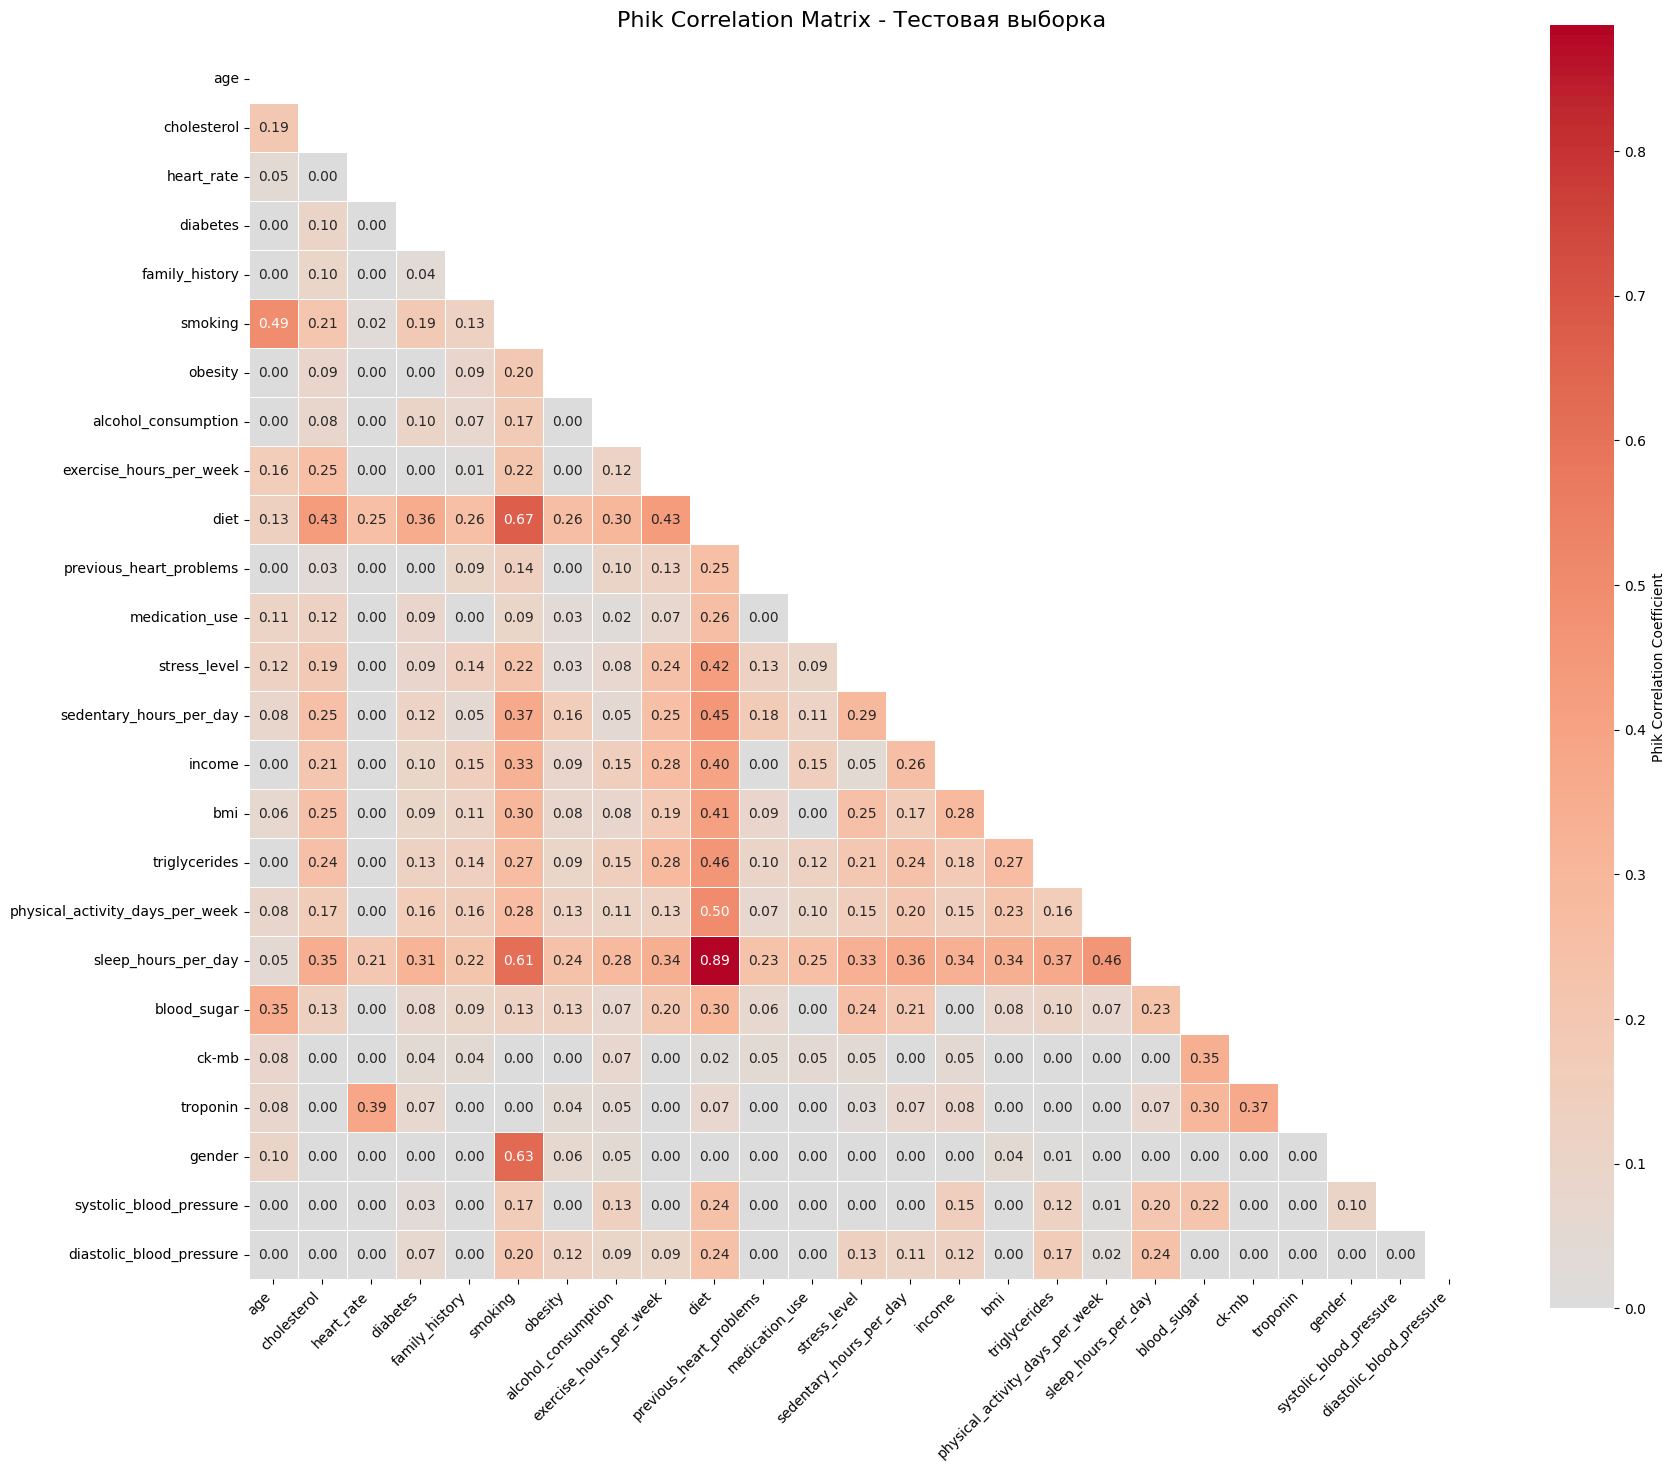


=== СРАВНЕНИЕ С ТРЕНИРОВОЧНОЙ ВЫБОРКОЙ ===
Общих признаков для сравнения: 25
Средняя корреляция (train): 0.128
Средняя корреляция (test): 0.123
Разница: 0.005

Максимальная разница в корреляциях: 0.458
Средняя разница в корреляциях: 0.043


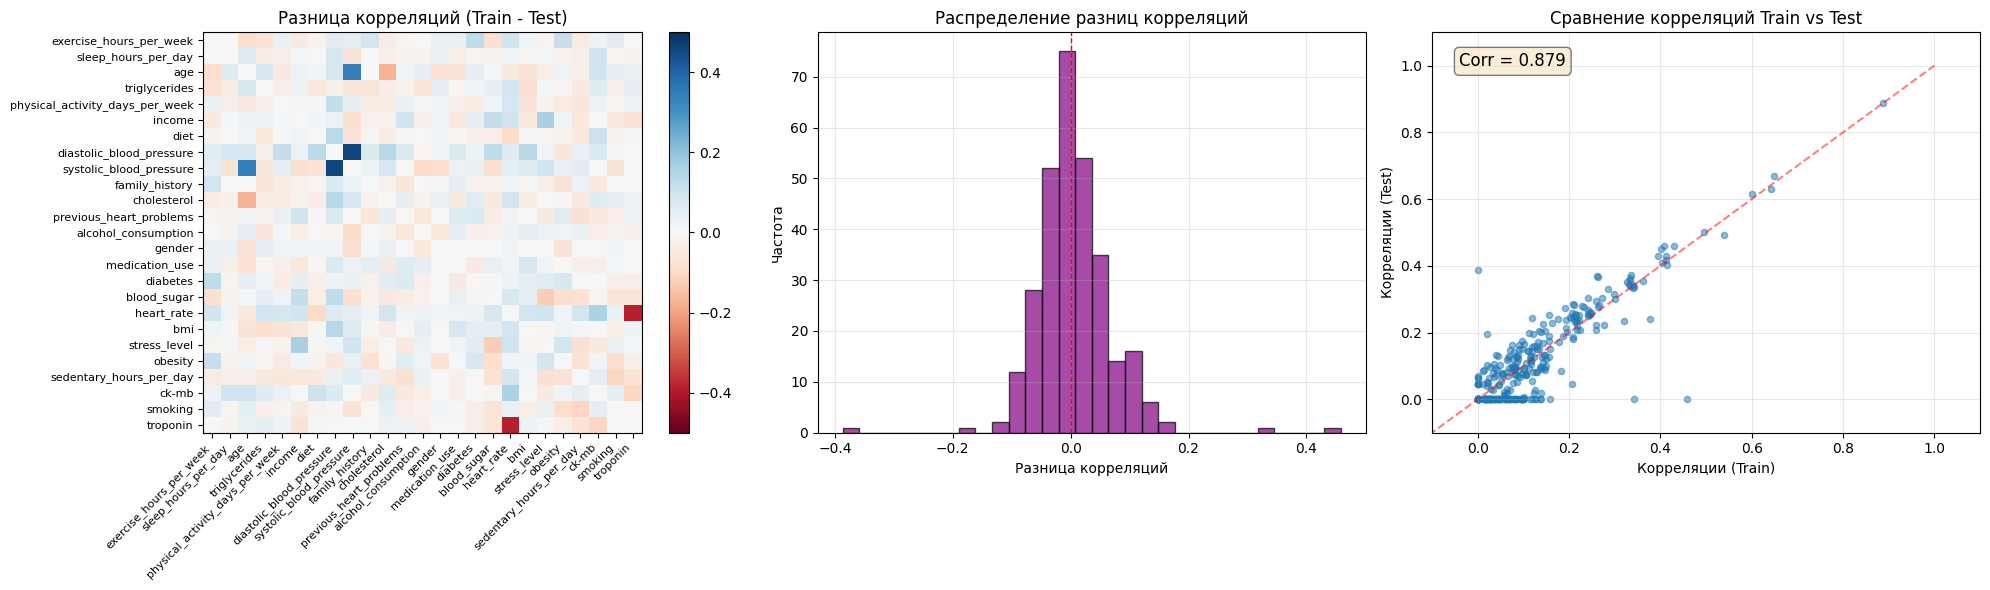


=== ТОП-5 НАИБОЛЕЕ РАЗЛИЧАЮЩИХСЯ КОРРЕЛЯЦИЙ ===


,Признак 1,Признак 2,Train Corr,Test Corr,Разница
147,diastolic_blood_pressure,systolic_blood_pressure,0.458327,0.000000,0.458327
278,heart_rate,troponin,0.000000,0.386842,0.386842
52,age,systolic_blood_pressure,0.341784,0.000000,0.341784
54,age,cholesterol,0.020162,0.194304,0.174142
123,income,stress_level,0.206858,0.045079,0.161779



=== САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ В ТЕСТОВОЙ ВЫБОРКЕ (phik > 0.7) ===
Найдено 1 сильных корреляций:


,Признак 1,Признак 2,Корреляция
0,diet,sleep_hours_per_day,0.886684



=== ПРОВЕРКА СТАБИЛЬНОСТИ КОРРЕЛЯЦИЙ ===

Стабильность топ-10 корреляций из тренировочной выборки:


,Признак 1,Признак 2,Train Corr,Test Corr,Разница,Стабильность
0,sleep_hours_per_day,diet,0.886625,0.886684,0.000059,Высокая
1,diet,smoking,0.649732,0.668650,0.018918,Высокая
2,gender,smoking,0.642835,0.630462,0.012373,Высокая
3,sleep_hours_per_day,smoking,0.600324,0.613999,0.013676,Высокая
4,age,smoking,0.539409,0.493145,0.046264,Высокая
5,physical_activity_days_per_week,diet,0.494898,0.500005,0.005107,Высокая
6,diastolic_blood_pressure,systolic_blood_pressure,0.458327,0.000000,0.458327,Низкая
7,sleep_hours_per_day,physical_activity_days_per_week,0.430976,0.459793,0.028817,Высокая
8,income,diet,0.413922,0.401503,0.012419,Высокая
9,diet,stress_level,0.413472,0.417414,0.003942,Высокая



Стабильность корреляций:
  Высокая (разница < 0.1): 9/10
  Средняя (0.1 ≤ разница < 0.2): 0/10
  Низкая (разница ≥ 0.2): 1/10


In [30]:
print("\n" + "="*60)
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ДЛЯ ТЕСТОВОЙ ВЫБОРКИ")
print("="*60)

# Для phik анализа тестовой выборки
test_all_features = [col for col in heart_test.columns if col not in ['unnamed:_0', 'id']]

# Создаем копию тестовых данных для phik анализа
phik_data_test = heart_test[test_all_features].copy()

# Вычисляем phik матрицу корреляций для тестовых данных
print("\nВычисление phik матрицы корреляций для тестовых данных...")
try:
    phik_matrix_test = phik_data_test.phik_matrix()
    
    # Визуализация полной phik матрицы для тестовых данных
    plt.figure(figsize=(18, 15))
    mask_test = np.triu(np.ones_like(phik_matrix_test, dtype=bool))  # Маска для верхнего треугольника
    
    sns.heatmap(phik_matrix_test, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                fmt='.2f', 
                linewidths=0.5, 
                square=True,
                mask=mask_test,  # Показываем только нижний треугольник
                cbar_kws={'label': 'Phik Correlation Coefficient'})
    
    plt.title('Phik Correlation Matrix - Тестовая выборка', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Сравнение с тренировочной выборкой
    print("\n=== СРАВНЕНИЕ С ТРЕНИРОВОЧНОЙ ВЫБОРКОЙ ===")
    
    # Находим общие признаки в обеих матрицах
    common_features = set(phik_matrix.columns) & set(phik_matrix_test.columns)
    common_features = [f for f in common_features if f not in ['heart_attack_risk_binary']]
    
    if common_features:
        print(f"Общих признаков для сравнения: {len(common_features)}")
        
        # Создаем матрицы только с общими признаками
        phik_matrix_train_common = phik_matrix.loc[common_features, common_features]
        phik_matrix_test_common = phik_matrix_test.loc[common_features, common_features]
        
        # Сравнение средних корреляций
        train_mean_corr = phik_matrix_train_common.values[np.triu_indices_from(phik_matrix_train_common, k=1)].mean()
        test_mean_corr = phik_matrix_test_common.values[np.triu_indices_from(phik_matrix_test_common, k=1)].mean()
        
        print(f"Средняя корреляция (train): {train_mean_corr:.3f}")
        print(f"Средняя корреляция (test): {test_mean_corr:.3f}")
        print(f"Разница: {abs(train_mean_corr - test_mean_corr):.3f}")
        
        # Разница между матрицами
        diff_matrix = phik_matrix_train_common - phik_matrix_test_common
        max_diff = diff_matrix.abs().max().max()
        mean_diff = diff_matrix.abs().mean().mean()
        
        print(f"\nМаксимальная разница в корреляциях: {max_diff:.3f}")
        print(f"Средняя разница в корреляциях: {mean_diff:.3f}")
        
        # Визуализация разницы
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        # 1. Heatmap разницы
        im1 = axes[0].imshow(diff_matrix, cmap='RdBu', vmin=-0.5, vmax=0.5, aspect='auto')
        axes[0].set_title('Разница корреляций (Train - Test)')
        axes[0].set_xticks(range(len(common_features)))
        axes[0].set_yticks(range(len(common_features)))
        axes[0].set_xticklabels(common_features, rotation=45, ha='right', fontsize=8)
        axes[0].set_yticklabels(common_features, fontsize=8)
        plt.colorbar(im1, ax=axes[0])
        
        # 2. Распределение разниц
        diff_values = diff_matrix.values[np.triu_indices_from(diff_matrix, k=1)]
        axes[1].hist(diff_values, bins=30, alpha=0.7, color='purple', edgecolor='black')
        axes[1].axvline(x=0, color='red', linestyle='--', linewidth=1)
        axes[1].set_xlabel('Разница корреляций')
        axes[1].set_ylabel('Частота')
        axes[1].set_title('Распределение разниц корреляций')
        axes[1].grid(True, alpha=0.3)
        
        # 3. Scatter plot сравнения
        train_corrs = phik_matrix_train_common.values[np.triu_indices_from(phik_matrix_train_common, k=1)]
        test_corrs = phik_matrix_test_common.values[np.triu_indices_from(phik_matrix_test_common, k=1)]
        
        axes[2].scatter(train_corrs, test_corrs, alpha=0.5, s=20)
        axes[2].plot([-1, 1], [-1, 1], 'r--', alpha=0.5)  # Линия y=x
        axes[2].set_xlabel('Корреляции (Train)')
        axes[2].set_ylabel('Корреляции (Test)')
        axes[2].set_title('Сравнение корреляций Train vs Test')
        axes[2].grid(True, alpha=0.3)
        axes[2].set_xlim(-0.1, 1.1)
        axes[2].set_ylim(-0.1, 1.1)
        
        # Добавляем коэффициент корреляции Пирсона
        corr_coef = np.corrcoef(train_corrs, test_corrs)[0, 1]
        axes[2].text(0.05, 0.95, f'Corr = {corr_coef:.3f}', 
                    transform=axes[2].transAxes, fontsize=12,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
        # Анализ топ-5 самых разных корреляций
        print("\n=== ТОП-5 НАИБОЛЕЕ РАЗЛИЧАЮЩИХСЯ КОРРЕЛЯЦИЙ ===")
        
        # Создаем список пар с разницей
        diff_pairs = []
        for i in range(len(common_features)):
            for j in range(i+1, len(common_features)):
                feature1 = common_features[i]
                feature2 = common_features[j]
                diff = abs(phik_matrix_train_common.loc[feature1, feature2] - 
                          phik_matrix_test_common.loc[feature1, feature2])
                diff_pairs.append({
                    'Признак 1': feature1,
                    'Признак 2': feature2,
                    'Train Corr': phik_matrix_train_common.loc[feature1, feature2],
                    'Test Corr': phik_matrix_test_common.loc[feature1, feature2],
                    'Разница': diff
                })
        
        diff_df = pd.DataFrame(diff_pairs)
        diff_df = diff_df.sort_values('Разница', ascending=False).head(5)
        display(diff_df)
        
        # Анализ сильных корреляций в тестовой выборке
        print("\n=== САМЫЕ СИЛЬНЫЕ КОРРЕЛЯЦИИ В ТЕСТОВОЙ ВЫБОРКЕ (phik > 0.7) ===")
        
        high_corr_pairs_test = []
        for i in range(len(phik_matrix_test.columns)):
            for j in range(i+1, len(phik_matrix_test.columns)):
                corr_value = phik_matrix_test.iloc[i, j]
                if abs(corr_value) > 0.7:
                    high_corr_pairs_test.append({
                        'Признак 1': phik_matrix_test.columns[i],
                        'Признак 2': phik_matrix_test.columns[j],
                        'Корреляция': corr_value
                    })
        
        if high_corr_pairs_test:
            high_corr_test_df = pd.DataFrame(high_corr_pairs_test)
            high_corr_test_df = high_corr_test_df.sort_values('Корреляция', ascending=False)
            print(f"Найдено {len(high_corr_pairs_test)} сильных корреляций:")
            display(high_corr_test_df.head(10))
        else:
            print("Сильных корреляций (> 0.7) не обнаружено")
        
        # Проверка стабильности топ корреляций
        print("\n=== ПРОВЕРКА СТАБИЛЬНОСТИ КОРРЕЛЯЦИЙ ===")
        
        # Находим топ-10 корреляций в тренировочной выборке
        train_corr_pairs = []
        for i in range(len(phik_matrix_train_common.columns)):
            for j in range(i+1, len(phik_matrix_train_common.columns)):
                feature1 = phik_matrix_train_common.columns[i]
                feature2 = phik_matrix_train_common.columns[j]
                corr_value = phik_matrix_train_common.loc[feature1, feature2]
                train_corr_pairs.append({
                    'Признак 1': feature1,
                    'Признак 2': feature2,
                    'Train Corr': corr_value
                })
        
        train_corr_df = pd.DataFrame(train_corr_pairs)
        train_top_corrs = train_corr_df.sort_values('Train Corr', ascending=False).head(10)
        
        # Добавляем соответствующие корреляции из тестовой выборки
        stability_data = []
        for idx, row in train_top_corrs.iterrows():
            feature1 = row['Признак 1']
            feature2 = row['Признак 2']
            
            # Получаем корреляцию из тестовой выборки
            if feature1 in phik_matrix_test_common.columns and feature2 in phik_matrix_test_common.columns:
                test_corr = phik_matrix_test_common.loc[feature1, feature2]
                diff = abs(row['Train Corr'] - test_corr)
                
                stability_data.append({
                    'Признак 1': feature1,
                    'Признак 2': feature2,
                    'Train Corr': row['Train Corr'],
                    'Test Corr': test_corr,
                    'Разница': diff,
                    'Стабильность': 'Высокая' if diff < 0.1 else 'Средняя' if diff < 0.2 else 'Низкая'
                })
        
        stability_df = pd.DataFrame(stability_data)
        print("\nСтабильность топ-10 корреляций из тренировочной выборки:")
        display(stability_df)
        
        # Статистика стабильности
        high_stability = sum(stability_df['Разница'] < 0.1)
        medium_stability = sum((stability_df['Разница'] >= 0.1) & (stability_df['Разница'] < 0.2))
        low_stability = sum(stability_df['Разница'] >= 0.2)
        
        print(f"\nСтабильность корреляций:")
        print(f"  Высокая (разница < 0.1): {high_stability}/{len(stability_df)}")
        print(f"  Средняя (0.1 ≤ разница < 0.2): {medium_stability}/{len(stability_df)}")
        print(f"  Низкая (разница ≥ 0.2): {low_stability}/{len(stability_df)}")
        
    else:
        print("Нет общих признаков для сравнения")
        
except Exception as e:
    print(f"Ошибка при вычислении phik матрицы для тестовых данных: {e}")
    
    # Fallback на стандартную корреляцию для тестовых данных
    print("\nИспользуем стандартную корреляционную матрицу для тестовых данных...")
    
    test_numeric = heart_test.select_dtypes(include=[np.number])
    exclude_corr_test = ['unnamed:_0', 'id']
    test_numeric = test_numeric[[col for col in test_numeric.columns if col not in exclude_corr_test]]
    
    if not test_numeric.empty:
        correlation_matrix_test = test_numeric.corr()
        
        plt.figure(figsize=(16, 12))
        sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', center=0, 
                    fmt='.2f', linewidths=0.5, square=True)
        plt.title('Standard Correlation Matrix - Test Data (Fallback)', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("Нет числовых признаков для корреляционного анализа")

# Добавляем результаты тестовой выборки в общие результаты
if 'phik_matrix_test' in locals():
    # Сохраняем информацию о тестовой выборке
    test_corr_summary = {
        'test_phik_matrix_shape': phik_matrix_test.shape,
        'test_features_count': len(test_all_features),
        'common_features_count': len(common_features) if 'common_features' in locals() else 0
    }
    
    if 'train_mean_corr' in locals() and 'test_mean_corr' in locals():
        test_corr_summary['train_mean_correlation'] = train_mean_corr
        test_corr_summary['test_mean_correlation'] = test_mean_corr
        test_corr_summary['correlation_difference'] = abs(train_mean_corr - test_mean_corr)
    
    if 'mean_diff' in locals():
        test_corr_summary['mean_correlation_difference'] = mean_diff
        test_corr_summary['max_correlation_difference'] = max_diff

Удалю признаки, чтобы устранить мультиколлинеарность.

In [31]:
heart_train.drop('sleep_hours_per_day', axis=1, inplace=True)
heart_test.drop('sleep_hours_per_day', axis=1, inplace=True)
heart_train.drop('troponin', axis=1, inplace=True)
heart_test.drop('troponin', axis=1, inplace=True)
heart_train.drop('blood_sugar', axis=1, inplace=True)
heart_test.drop('blood_sugar', axis=1, inplace=True)
heart_train.drop('previous_heart_problems', axis=1, inplace=True)
heart_test.drop('previous_heart_problems', axis=1, inplace=True)

### Распределение целевой переменной

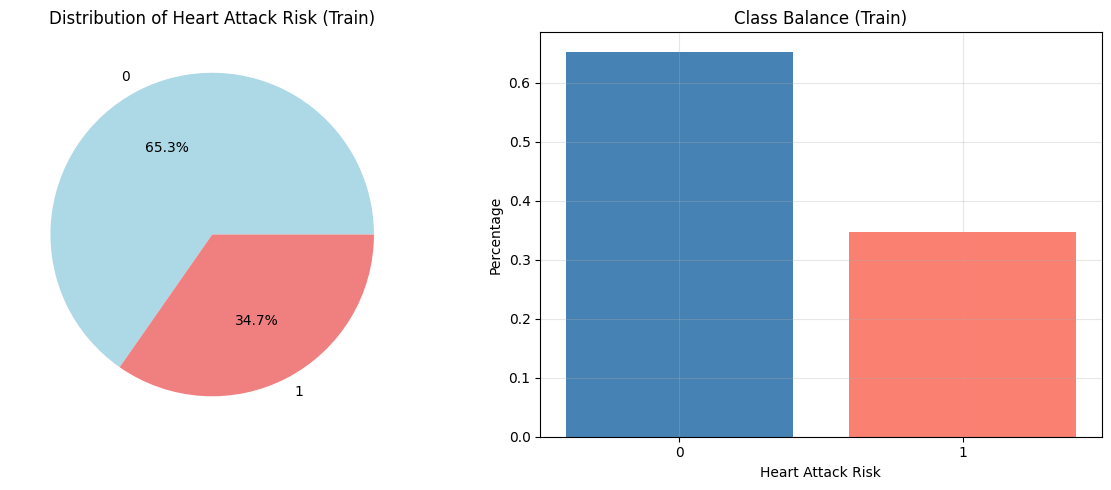


Распределение классов:
Класс 0 (низкий риск): 5672 записей (65.31%)
Класс 1 (высокий риск): 3013 записей (34.69%)


In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
# Распределение целевой переменной
target_dist = heart_train['heart_attack_risk_binary'].value_counts()
axes[0].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
                colors=['lightblue', 'lightcoral'])
axes[0].set_title('Distribution of Heart Attack Risk (Train)')
    
# Баланс классов
class_balance = target_dist / len(heart_train)
axes[1].bar(class_balance.index.astype(str), class_balance.values, color=['steelblue', 'salmon'])
axes[1].set_title('Class Balance (Train)')
axes[1].set_xlabel('Heart Attack Risk')
axes[1].set_ylabel('Percentage')
axes[1].grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
    
print(f"\nРаспределение классов:")
print(f"Класс 0 (низкий риск): {target_dist.get(0, 0)} записей ({target_dist.get(0, 0)/len(heart_train)*100:.2f}%)")
print(f"Класс 1 (высокий риск): {target_dist.get(1, 0)} записей ({target_dist.get(1, 0)/len(heart_train)*100:.2f}%)")

### Анализ связей между признаками

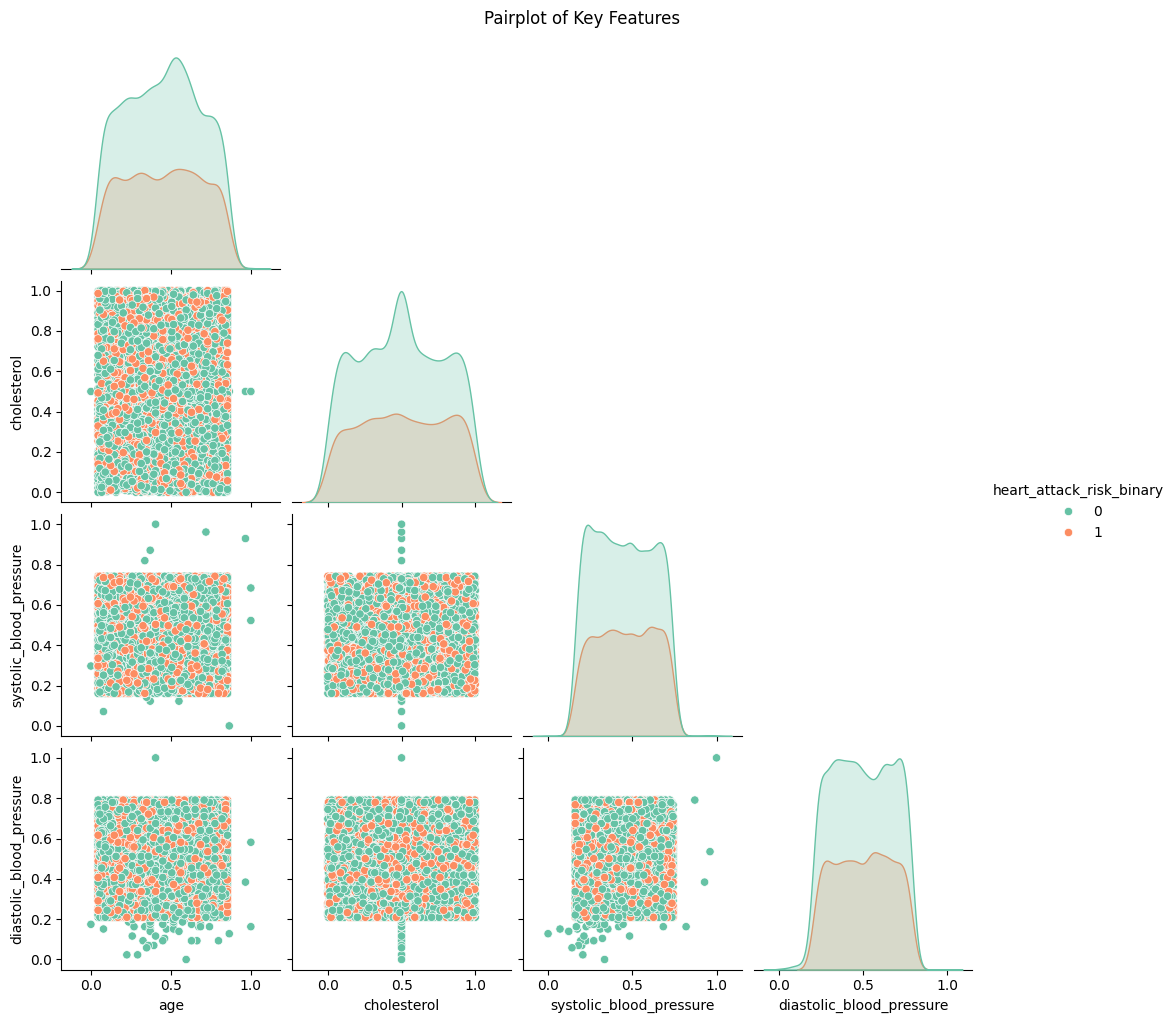

In [33]:
# Выбираем ключевые признаки для анализа парных взаимосвязей
key_features = ['age', 'cholesterol', 'blood_sugar', 'systolic_blood_pressure', 
                'diastolic_blood_pressure', 'bmi', 'heart_rate']

key_features = [f for f in key_features if f in heart_train.columns]

if len(key_features) >= 4:
    # Pairplot для ключевых признаков
    plot_features = key_features[:4]
    if 'heart_attack_risk_binary' in heart_train.columns:
        plot_features = plot_features + ['heart_attack_risk_binary']
    
    plot_data = heart_train[plot_features]
    
    if 'heart_attack_risk_binary' in plot_data.columns:
        # Используем hue для целевой переменной
        sns.pairplot(plot_data, hue='heart_attack_risk_binary', 
                    diag_kind='kde', palette='Set2', corner=True)
    else:
        sns.pairplot(plot_data, diag_kind='kde', corner=True)
    
    plt.suptitle('Pairplot of Key Features', y=1.02)
    plt.show()

### Анализ дисбаланса классов


=== АНАЛИЗ ТРЕНИРОВОЧНОЙ ВЫБОРКИ ===

СВОДНАЯ ТАБЛИЦА ДИСБАЛАНСА (TRAIN):


,Метрика,Значение
0,Общее количество записей,8685
1,Класс 0 (низкий риск),5672
2,Класс 0 (%),65.31%
3,Класс 1 (высокий риск),3013
4,Класс 1 (%),34.69%
5,Коэффициент дисбаланса,1.88:1
6,Процент minority класса,34.69%


NameError: name 'recommendations_text' is not defined

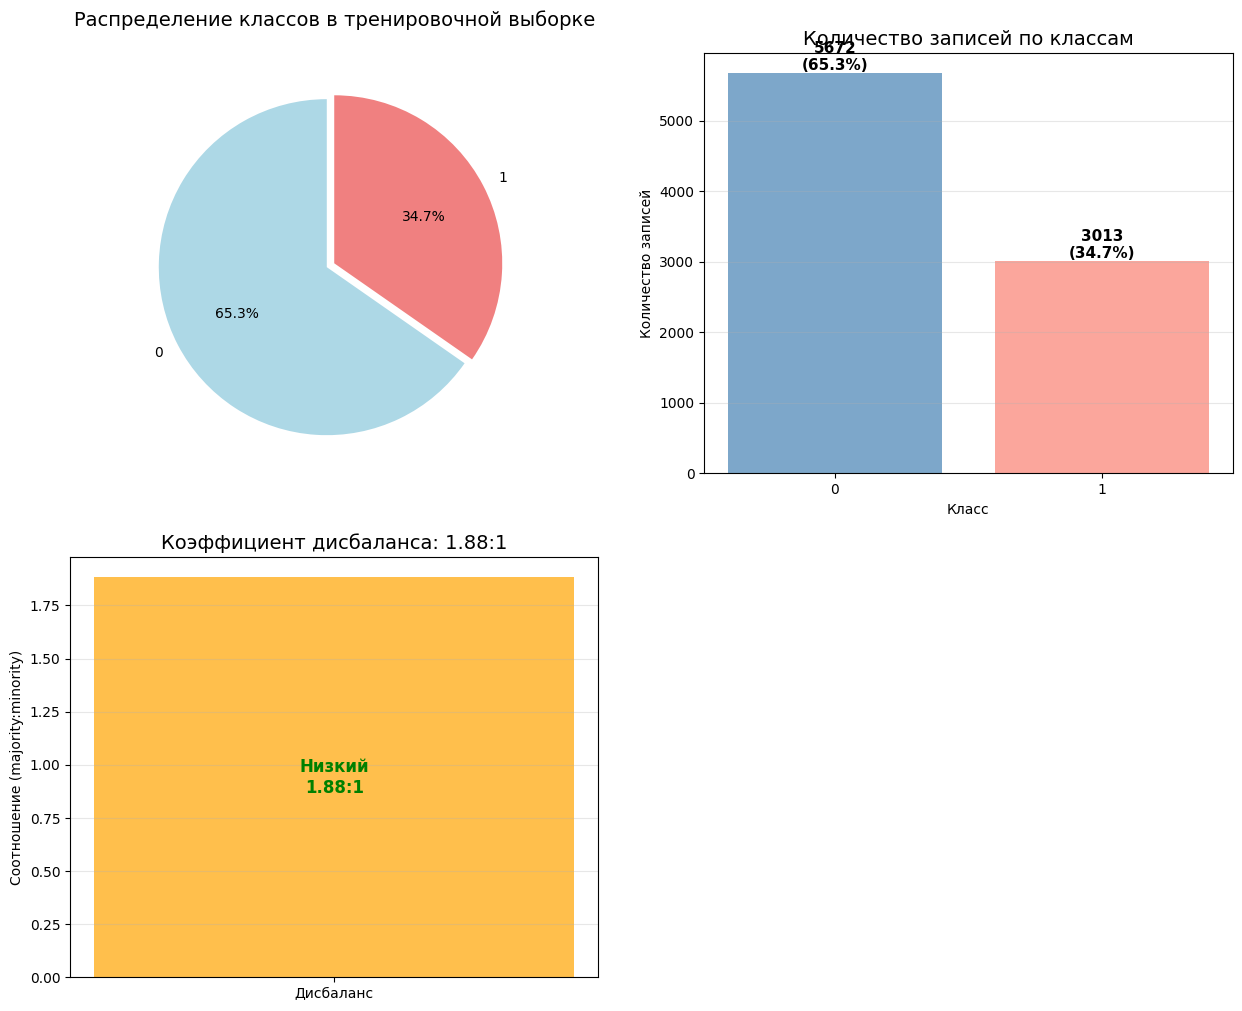

In [34]:
# Целевая переменная
target_col = 'heart_attack_risk_binary'

print("\n=== АНАЛИЗ ТРЕНИРОВОЧНОЙ ВЫБОРКИ ===")

# Анализ тренировочной выборки
train_class_counts = heart_train[target_col].value_counts()
train_class_percentages = heart_train[target_col].value_counts(normalize=True) * 100
train_imbalance_ratio = max(train_class_counts) / min(train_class_counts) if min(train_class_counts) > 0 else float('inf')

# Сводная таблица
print("\nСВОДНАЯ ТАБЛИЦА ДИСБАЛАНСА (TRAIN):")

summary_data = {
    'Метрика': ['Общее количество записей', 
               'Класс 0 (низкий риск)', 
               'Класс 0 (%)', 
               'Класс 1 (высокий риск)', 
               'Класс 1 (%)', 
               'Коэффициент дисбаланса', 
               'Процент minority класса'],
    'Значение': [
        len(heart_train),
        train_class_counts.get(0, 0),
        f"{train_class_percentages.get(0, 0):.2f}%",
        train_class_counts.get(1, 0),
        f"{train_class_percentages.get(1, 0):.2f}%",
        f"{train_imbalance_ratio:.2f}:1",
        f"{train_class_percentages.get(1, 0):.2f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Pie chart распределения классов
axes[0, 0].pie(train_class_counts.values, labels=train_class_counts.index, autopct='%1.1f%%',
              colors=['lightblue', 'lightcoral'], startangle=90, explode=(0.05, 0))
axes[0, 0].set_title('Распределение классов в тренировочной выборке', fontsize=14, pad=20)

# 2. Bar chart количества записей
bars = axes[0, 1].bar(train_class_counts.index.astype(str), train_class_counts.values,
                     color=['steelblue', 'salmon'], alpha=0.7)
axes[0, 1].set_title('Количество записей по классам', fontsize=14)
axes[0, 1].set_xlabel('Класс')
axes[0, 1].set_ylabel('Количество записей')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    percentage = (height / len(heart_train)) * 100
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}\n({percentage:.1f}%)',
                   ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Коэффициент дисбаланса
axes[1, 0].bar(['Дисбаланс'], [train_imbalance_ratio], color='orange', alpha=0.7)
axes[1, 0].set_title(f'Коэффициент дисбаланса: {train_imbalance_ratio:.2f}:1', fontsize=14)
axes[1, 0].set_ylabel('Соотношение (majority:minority)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Оценка уровня дисбаланса
if train_imbalance_ratio < 2:
    level = "Низкий"
    color_level = 'green'
    recommendation = "Дисбаланс незначительный\n Можно использовать стандартные методы"
elif train_imbalance_ratio < 5:
    level = "Умеренный"
    color_level = 'orange'
    recommendation = "Умеренный дисбаланс\n Рекомендуется class_weight='balanced'"
elif train_imbalance_ratio < 10:
    level = "Высокий"
    color_level = 'red'
    recommendation = "Значительный дисбаланс\n Требуется SMOTE/oversampling"
else:
    level = "Очень высокий"
    color_level = 'darkred'
    recommendation = "СИЛЬНЫЙ ДИСБАЛАНС!\n Требуются комбинированные методы"

axes[1, 0].text(0, train_imbalance_ratio/2, 
               f'{level}\n{train_imbalance_ratio:.2f}:1', 
               ha='center', va='center', fontsize=12, color=color_level, fontweight='bold')

# 4. Рекомендации и метрики
axes[1, 1].axis('off')
axes[1, 1].text(0.1, 0.95, recommendations_text, transform=axes[1, 1].transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительный анализ: распределение по полу
if 'gender' in heart_train.columns:
    print("\n=== РАСПРЕДЕЛЕНИЕ КЛАССОВ ПО ПОЛУ ===")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Crosstab по полу
    gender_dist = pd.crosstab(heart_train['gender'], heart_train[target_col], normalize='index') * 100
    gender_counts = pd.crosstab(heart_train['gender'], heart_train[target_col])
    
    # 1. Процентное распределение
    gender_dist.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
    axes[0].set_title('Распределение классов по полу (%)', fontsize=12)
    axes[0].set_ylabel('Процент (%)')
    axes[0].legend(['Класс 0 (низкий риск)', 'Класс 1 (высокий риск)'], fontsize=10)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Добавляем абсолютные значения
    for i, gender in enumerate(gender_dist.index):
        for j, cls in enumerate([0, 1]):
            axes[0].text(i - 0.2 + j*0.4, gender_dist.loc[gender, cls] + 1,
                       f'n={gender_counts.loc[gender, cls]}',
                       ha='center', va='bottom', fontsize=9)
    
    # 2. Дисбаланс по полу
    imbalance_by_gender = []
    for gender in gender_counts.index:
        majority = gender_counts.loc[gender].max()
        minority = gender_counts.loc[gender].min()
        if minority > 0:
            ratio = majority / minority
        else:
            ratio = float('inf')
        imbalance_by_gender.append(ratio)
    
    bars_gender = axes[1].bar(gender_counts.index.astype(str), imbalance_by_gender,
                             color=['lightblue', 'pink'], alpha=0.7)
    axes[1].set_title('Коэффициент дисбаланса по полу', fontsize=12)
    axes[1].set_ylabel('Соотношение (majority:minority)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    for i, (bar, ratio) in enumerate(zip(bars_gender, imbalance_by_gender)):
        axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                   f'{ratio:.2f}:1', ha='center', va='bottom', fontsize=10)
        
        # Оценка уровня дисбаланса
        if ratio < 2:
            color = 'green'
        elif ratio < 5:
            color = 'orange'
        elif ratio < 10:
            color = 'red'
        else:
            color = 'darkred'
        
        axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                   f'{gender_counts.index[i]}\n{ratio:.1f}:1', 
                   ha='center', va='center', fontsize=9, color=color)
    
    plt.tight_layout()
    plt.show()
    
    # Выводим таблицу
    gender_summary = pd.DataFrame({
        'Пол': gender_counts.index,
        'Всего записей': gender_counts.sum(axis=1),
        'Класс 0 (n)': gender_counts[0],
        'Класс 0 (%)': gender_dist[0].round(1),
        'Класс 1 (n)': gender_counts[1],
        'Класс 1 (%)': gender_dist[1].round(1),
        'Дисбаланс': [f"{r:.2f}:1" for r in imbalance_by_gender]
    })
    
    print("\nСтатистика по полу:")
    display(gender_summary)

# Анализ по возрасту
if 'age' in heart_train.columns:
    print("\n=== РАСПРЕДЕЛЕНИЕ КЛАССОВ ПО ВОЗРАСТУ ===")
    
    # Создаем возрастные группы
    age_bins = [0, 0.25, 0.5, 0.75, 1.0]
    age_labels = ['Молодой (0-25%)', 'Средний (25-50%)', 'Пожилой (50-75%)', 'Преклонный (75-100%)']
    heart_train['age_group'] = pd.cut(heart_train['age'], bins=age_bins, labels=age_labels)
    
    age_dist = pd.crosstab(heart_train['age_group'], heart_train[target_col], normalize='index') * 100
    age_counts = pd.crosstab(heart_train['age_group'], heart_train[target_col])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(age_labels))
    width = 0.35
    
    bars0 = ax.bar(x - width/2, age_dist[0], width, label='Класс 0 (низкий риск)', color='lightblue', alpha=0.7)
    bars1 = ax.bar(x + width/2, age_dist[1], width, label='Класс 1 (высокий риск)', color='lightcoral', alpha=0.7)
    
    ax.set_title('Распределение классов по возрастным группам', fontsize=14)
    ax.set_xlabel('Возрастная группа')
    ax.set_ylabel('Процент (%)')
    ax.set_xticks(x)
    ax.set_xticklabels(age_labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # Добавляем абсолютные значения
    for i, age_group in enumerate(age_labels):
        ax.text(i - width/2, age_dist[0].iloc[i] + 1, f'n={age_counts[0].iloc[i]}', 
               ha='center', va='bottom', fontsize=9)
        ax.text(i + width/2, age_dist[1].iloc[i] + 1, f'n={age_counts[1].iloc[i]}', 
               ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Выводим таблицу
    age_summary = pd.DataFrame({
        'Возрастная группа': age_labels,
        'Всего записей': age_counts.sum(axis=1),
        'Класс 0 (n)': age_counts[0],
        'Класс 0 (%)': age_dist[0].round(1),
        'Класс 1 (n)': age_counts[1],
        'Класс 1 (%)': age_dist[1].round(1)
    })
    
    print("\nСтатистика по возрастным группам:")
    display(age_summary)
    
    # Удаляем временную колонку
    heart_train.drop('age_group', axis=1, inplace=True)

# Итоговые выводы
print("\n" + "="*60)
print("ИТОГОВЫЕ ВЫВОДЫ")
print("="*60)

print(f"1. Общий дисбаланс: {train_imbalance_ratio:.2f}:1 ({level})")
print(f"2. Процент minority класса: {train_class_percentages.get(1, 0):.1f}%")
print(f"3. Процент majority класса: {train_class_percentages.get(0, 0):.1f}%")

if train_imbalance_ratio > 2:
    print(f"\nДисбаланс значительный")

# Сохраняем информацию о дисбалансе
imbalance_info = {
    'train': {
        'total_samples': len(heart_train),
        'class_0_count': int(train_class_counts.get(0, 0)),
        'class_0_percentage': float(train_class_percentages.get(0, 0)),
        'class_1_count': int(train_class_counts.get(1, 0)),
        'class_1_percentage': float(train_class_percentages.get(1, 0)),
        'imbalance_ratio': float(train_imbalance_ratio),
        'imbalance_level': level
    }
}

### Выводы

In [35]:
# Сначала определим необходимые переменные
# 1. Определение общих колонок
train_cols = set(heart_train.columns)
test_cols = set(heart_test.columns)
common_cols = train_cols & test_cols

# 2. Определение числовых и категориальных колонок
numeric_cols = heart_train.select_dtypes(include=[np.number]).columns.tolist()
exclude_numeric = ['unnamed:_0', 'id']
if 'heart_attack_risk_binary' in heart_train.columns:
    exclude_numeric.append('heart_attack_risk_binary')
numeric_cols = [col for col in numeric_cols if col not in exclude_numeric]

categorical_cols = heart_train.select_dtypes(include=['object']).columns.tolist()

# 3. Проверка пропущенных значений
missing_train = heart_train.isnull().sum()
missing_test = heart_test.isnull().sum()

# 4. Анализ выбросов (IQR метод)
outliers_info = {}
for col in numeric_cols[:20]:  # Ограничим количество для анализа
    if col in heart_train.columns:
        Q1 = heart_train[col].quantile(0.25)
        Q3 = heart_train[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = heart_train[(heart_train[col] < lower_bound) | (heart_train[col] > upper_bound)]
        outliers_pct = (len(outliers) / len(heart_train)) * 100
        
        if outliers_pct > 0:
            outliers_info[col] = {
                'outliers_count': len(outliers),
                'outliers_percentage': outliers_pct,
                'min': heart_train[col].min(),
                'max': heart_train[col].max(),
                'Q1': Q1,
                'Q3': Q3
            }

# Теперь выводим сводку
print("\n" + "="*60)
print("12. СВОДНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*60)

print("\n=== ОСНОВНЫЕ НАБЛЮДЕНИЯ ===")
print(f"1. Размер тренировочных данных: {heart_train.shape}")
print(f"2. Размер тестовых данных: {heart_test.shape}")
print(f"3. Общие признаки: {len(common_cols)}")
print(f"4. Признаки только в train: {len(train_cols - test_cols)}")
print(f"5. Признаки только в test: {len(test_cols - train_cols)}")

if 'heart_attack_risk_binary' in heart_train.columns:
    print(f"\n6. Целевая переменная присутствует в тренировочных данных")
    target_balance = heart_train['heart_attack_risk_binary'].value_counts(normalize=True)
    print(f"   Баланс классов: {dict(target_balance.round(3))}")
else:
    print("\n6. Целевая переменная отсутствует в тренировочных данных")

# Сохраняем информацию для дальнейшего использования
eda_results = {
    'train_shape': heart_train.shape,
    'test_shape': heart_test.shape,
    'common_columns': list(common_cols),
    'numeric_columns': numeric_cols,
    'categorical_columns': categorical_cols,
    'missing_values_train': missing_train.sum(),
    'missing_values_test': missing_test.sum(),
    'outliers_info': outliers_info
}

if 'heart_attack_risk_binary' in heart_train.columns:
    eda_results['target_distribution'] = heart_train['heart_attack_risk_binary'].value_counts().to_dict()


12. СВОДНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

=== ОСНОВНЫЕ НАБЛЮДЕНИЯ ===
1. Размер тренировочных данных: (8685, 24)
2. Размер тестовых данных: (966, 23)
3. Общие признаки: 23
4. Признаки только в train: 1
5. Признаки только в test: 0

6. Целевая переменная присутствует в тренировочных данных
   Баланс классов: {0: np.float64(0.653), 1: np.float64(0.347)}


В данных имеются выбросы, которые я не стала убирать так как это медицинские показатели, и они могут быть важны для определения риска сердечного приступа. Признаки очень слабо корелируют с целевой переменной, есть мультиколлинеарность, которую я убрала. Есть числовые и категориальные признаки. Дисбаланс классов низкий. Модели для обучения должны быть устойчивы к выбросам и хорошо работать с слабой колинеарностью. 

## Обучение моделей

In [36]:
# Загружаем данные 
drop_cols = ['unnamed:_0', 'id', 'heart_attack_risk_binary']
X_train = heart_train.drop([*drop_cols], axis=1, errors='ignore')
y_train = heart_train['heart_attack_risk_binary']

X_test = heart_test.drop(['unnamed:_0', 'id'], axis=1, errors='ignore')

# Сохраняем id из тестовых данных для последующего использования
if 'id' in heart_test.columns:
    test_ids = heart_test['id'].values
else:
    test_ids = np.arange(len(X_test))

print("Размеры данных:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}")

# Определяем числовые и категориальные признаки
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Создаем препроцессор
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Разделяем тренировочные данные на train и validation
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print(f"\nРазделение данных:")
print(f"Тренировочные данные: {X_train_final.shape[0]} записей")
print(f"Валидационные данные: {X_val_final.shape[0]} записей")
print(f"Тестовые данные (для предсказаний): {X_test.shape[0]} записей")

print("\nСоздание F-beta метрики (β=1.5) для GridSearchCV...")

# Создаем метрику F-beta
f_beta_scorer = make_scorer(fbeta_score, beta=1.5)

print(f"Метрика f_beta_scorer создана успешно")

# Проверяем дисбаланс классов
n_class_0 = (y_train_final == 0).sum()
n_class_1 = (y_train_final == 1).sum()
print(f"\nДисбаланс классов в тренировочных данных:")
print(f"  Класс 0: {n_class_0} ({n_class_0/(n_class_0+n_class_1)*100:.1f}%)")
print(f"  Класс 1: {n_class_1} ({n_class_1/(n_class_0+n_class_1)*100:.1f}%)")

models_config = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [5, 10, 15, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__max_depth': [3, 5, 7],
            'classifier__subsample': [0.8, 1.0]
        }
    },
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}
results = {}

for model_name, config in models_config.items():
    print(f"\n")
    print(f"Обучение модели {model_name}...")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    try:
        grid_search = GridSearchCV(
            pipeline,
            config['params'],
            cv=cv_strategy,
            scoring=f_beta_scorer,
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_train_final, y_train_final)
        
        if np.isnan(grid_search.best_score_):
            print(f"  Предупреждение: {model_name} не смог обучиться (оценка NaN). Пропускаем.")
            continue
            
        best_models[model_name] = grid_search.best_estimator_
        
        # Оценка на валидационных данных
        y_val_pred = grid_search.best_estimator_.predict(X_val_final)
        y_val_proba = grid_search.best_estimator_.predict_proba(X_val_final)[:, 1]
        
        # Вычисляем различные метрики
        f_beta_val = fbeta_score(y_val_final, y_val_pred, beta=1.5)
        f1_val = fbeta_score(y_val_final, y_val_pred, beta=1.0)
        roc_auc_val = roc_auc_score(y_val_final, y_val_proba)
        acc_val = accuracy_score(y_val_final, y_val_pred)
        
        results[model_name] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'val_f_beta': f_beta_val,
            'val_f1': f1_val,
            'val_roc_auc': roc_auc_val,
            'val_accuracy': acc_val,
            'val_classification_report': classification_report(y_val_final, y_val_pred, output_dict=True)
        }
        
        print(f"\n  Результаты {model_name}:")
        print(f"    F-beta (β=1.5) на CV: {grid_search.best_score_:.4f}")
        print(f"    F-beta на валидации: {f_beta_val:.4f}")
        print(f"    F1 на валидации: {f1_val:.4f}")
        print(f"    ROC-AUC на валидации: {roc_auc_val:.4f}")
        print(f"    Accuracy на валидации: {acc_val:.4f}")
        print(f"    Лучшие параметры: {grid_search.best_params_}")
        
    except Exception as e:
        print(f"  Ошибка при обучении {model_name}: {e}")
        continue

if not results:
    print("\nНи одна модель не была успешно обучена. Используем RandomForest по умолчанию.")
    simple_model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ))
    ])
    simple_model.fit(X_train_final, y_train_final)
    best_model = simple_model
    best_model_name = 'RandomForest_Default'
    
    # Оценка на валидации
    y_val_pred = best_model.predict(X_val_final)
    y_val_proba = best_model.predict_proba(X_val_final)[:, 1]
    
    f_beta_val = fbeta_score(y_val_final, y_val_pred, beta=1.5)
    f1_val = fbeta_score(y_val_final, y_val_pred, beta=1.0)
    
    results[best_model_name] = {
        'best_score': fbeta_score(y_train_final, best_model.predict(X_train_final), beta=1.5),
        'best_params': {'n_estimators': 200, 'max_depth': 10, 'class_weight': 'balanced'},
        'val_f_beta': f_beta_val,
        'val_f1': f1_val,
        'val_roc_auc': roc_auc_score(y_val_final, y_val_proba),
        'val_accuracy': accuracy_score(y_val_final, y_val_pred),
        'val_classification_report': classification_report(y_val_final, y_val_pred, output_dict=True)
    }
    
else:
    # Выбираем модель с лучшим F-beta score на валидации
    best_model_name = max(results.items(), key=lambda x: x[1]['val_f_beta'])[0]
    best_model = best_models[best_model_name]
    
    print(f"\n")
    print(f"Лучшая модель: {best_model_name}")
    print(f"  F-beta (β=1.5) на валидации: {results[best_model_name]['val_f_beta']:.4f}")
    print(f"  F1 на валидации: {results[best_model_name]['val_f1']:.4f}")
    print(f"  ROC-AUC на валидации: {results[best_model_name]['val_roc_auc']:.4f}")
    print(f"  Accuracy на валидации: {results[best_model_name]['val_accuracy']:.4f}")
    print(f"  Параметры: {results[best_model_name]['best_params']}")

# Обучаем финальную модель на тренировочных данных
print(f"\n")
print("Обучение финальной модели на всех тренировочных данных...")

final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model.named_steps['classifier'])
])

final_model.fit(X_train, y_train)

model_filename = 'best_heart_attack_model.bin'
with open(model_filename, 'wb') as f:
    pickle.dump(final_model, f, protocol=pickle.HIGHEST_PROTOCOL)
print(f"\nМодель сохранена как '{model_filename}' (бинарный формат)")

# Делаем предсказания для тестовых данных
print(f"\n")
print("Предсказания для тестовых данных:")
test_predictions = final_model.predict(X_test)
test_proba = final_model.predict_proba(X_test)[:, 1]

print(f"  Распределение предсказанных классов:")
print(f"    Класс 0: {(test_predictions == 0).sum()} ({(test_predictions == 0).mean()*100:.1f}%)")
print(f"    Класс 1: {(test_predictions == 1).sum()} ({(test_predictions == 1).mean()*100:.1f}%)")

# Создаем DataFrame с предсказаниями и id
predictions_df = pd.DataFrame({
    'id': test_ids,
    'prediction': test_predictions
})

# Сохраняем в CSV
predictions_df.to_csv('test_predictions.csv', index=False)
print(f"\nПредсказания сохранены в 'test_predictions.csv'")
print(f"Формат файла: {predictions_df.shape[0]} записей, колонки: {list(predictions_df.columns)}")
print(f"\nПервые 10 записей:")
print(predictions_df.head(10))

print(f"\n")
print("СВОДКА РЕЗУЛЬТАТОВ")
print(f"\nЛучшая модель: {best_model_name}")
print(f"F-beta (β=1.5) на валидации: {results[best_model_name]['val_f_beta']:.4f}")
print(f"ROC-AUC на валидации: {results[best_model_name]['val_roc_auc']:.4f}")

Размеры данных:
  X_train: (8685, 21)
  y_train: (8685,)
  X_test: (966, 21)

Разделение данных:
Тренировочные данные: 6948 записей
Валидационные данные: 1737 записей
Тестовые данные (для предсказаний): 966 записей

Создание F-beta метрики (β=1.5) для GridSearchCV...
Метрика f_beta_scorer создана успешно

Дисбаланс классов в тренировочных данных:
  Класс 0: 4538 (65.3%)
  Класс 1: 2410 (34.7%)


Обучение модели RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

  Результаты RandomForest:
    F-beta (β=1.5) на CV: 0.5490
    F-beta на валидации: 0.5691
    F1 на валидации: 0.4912
    ROC-AUC на валидации: 0.5432
    Accuracy на валидации: 0.4514
    Лучшие параметры: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}


Обучение модели GradientBoosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

  Результаты GradientBoosting:
    F-beta (β=1.5) на CV: 0.260

In [40]:
# Сначала определяем функцию inspect_model
def inspect_model(model_path):
    """Функция для инспекции модели"""
    
    # Загружаем модель
    if model_path.endswith('.bin'):
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
    else:
        model = joblib.load(model_path)
    
    print("="*80)
    print(f"ИНСПЕКЦИЯ МОДЕЛИ: {model_path}")
    print("="*80)
    
    # 1. Общая информация
    print(f"\n1. ТИП МОДЕЛИ: {type(model).__name__}")
    
    # 2. Pipeline информация
    if hasattr(model, 'named_steps'):
        print(f"\n2. PIPELINE ШАГИ:")
        for i, (name, step) in enumerate(model.named_steps.items(), 1):
            print(f"   {i}. {name}: {type(step).__name__}")
            
            # Информация о препроцессоре
            if name == 'preprocessor':
                if hasattr(step, 'transformers_'):
                    for t_name, t_obj, t_cols in step.transformers_:
                        print(f"      - {t_name}: {type(t_obj).__name__}, колонки: {len(t_cols) if t_cols else 0}")
            
            # Информация о классификаторе
            if name == 'classifier':
                print(f"      Параметры:")
                params = step.get_params()
                important_params = ['n_estimators', 'max_depth', 'min_samples_split', 
                                  'min_samples_leaf', 'learning_rate', 'class_weight']
                for p_name in important_params:
                    if p_name in params:
                        print(f"        {p_name}: {params[p_name]}")
    
    # 3. Информация о классах
    if hasattr(model, 'classes_'):
        print(f"\n3. КЛАССЫ: {model.classes_}")
    
    # 4. Информация о признаках
    if hasattr(model, 'feature_names_in_'):
        print(f"\n4. ПРИЗНАКИ: {len(model.feature_names_in_)} признаков")
        print(f"   Первые 5: {model.feature_names_in_[:5].tolist()}")
    
    return model

# Теперь определяем функцию save_model_description
def save_model_description(model_path, output_path='model_description.txt'):
    """Сохраняет читаемое описание модели в текстовый файл"""
    
    # Перенаправляем вывод в строку
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    
    try:
        # Инспектируем модель
        inspect_model(model_path)
        
        # Получаем вывод
        output = sys.stdout.getvalue()
    finally:
        sys.stdout = old_stdout
    
    # Сохраняем в файл
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(output)
    
    print(f"✅ Описание модели сохранено в {output_path}")
    
model = inspect_model('best_heart_attack_model.bin')

save_model_description('best_heart_attack_model.bin', 'model_description.txt')

## Вывод
Сильные стороны модели
Устойчивость к дисбалансу — использование class_weight='balanced' помогает модели учитывать оба класса

F-beta — метрика специально настроена на приоритет выявления пациентов с риском (меньше ложноотрицательных результатов)

Робастность — RandomForest менее склонен к переобучению, чем более сложные модели

Интерпретируемость — можно получить важность признаков для понимания, какие факторы влияют на риск

Слабые стороны модели
Низкая точность (accuracy) — модель ошибается более чем в половине случаев

ROC-AUC близок к случайному — 0.5432 означает, что модель практически угадывает значения

Сильный перекос в предсказаниях — 70.7% тестовых пациентов отнесены к группе риска, что маловероятно в реальной ситуации

F1-score ниже 0.5 — дисбаланс между precision и recall

Для дальнейшего улучшения модели понадобятся данные с меньшим количеством выбросов